# Supermarket Sales- EDA  - Dharani K.S

# Introduction :

-  The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data from Jan 2019 to Mar 2019.
- This dataset is a collection of data from a supermarket company in Myanmar, which has three branches in Yangon, Mandalay, and Naypyitaw. We want to evaluate customer satisfaction from several factors by doing exploratory data analysis to see some of the relationships of the available variables on their supermarket sales dataset.

## Problem Statement:

Analyse the sales dataset and find which branch can be expanded, what are domains to be targeted and improved, Which payment service should be focussed more, what is the peak business time and day ? Also suggest some insights to improve the business and customer satisfaction. 

### About the Columns:

- Invoice id: Computer generated sales slip invoice identification number

- Branch: Branch of supercenter (3 branches are available identified by A, B and C).

- City: Location of supercenters

- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

- Gender: Gender type of customer

- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
- Unit price: Price of each product in $

- Quantity: Number of products purchased by customer

- Tax: 5% tax fee for customer buying

- Total: Total price including tax

- Date: Date of purchase (Record available from January 2019 to March 2019)

- Time: Purchase time (10am to 9pm)

- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

- COGS: Cost of goods sold

- Gross margin percentage: Gross margin percentage
- Gross income: Gross income

- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)



## Workflow
- Importing the required libraries 
- Reading the data
- About the Dataset
- Data preprocessing
- Data Cleaning
- Exploring the Dataset
- Univariate analysis
- Bivariate analysis
- Multivariate analysis
- Distributions
- Hypothesis Testing
- Conclusion and Insights

# Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
from scipy.stats import boxcox
from scipy.stats import normaltest

# Reading the Dataset

In [36]:
df=pd.read_csv("supermarket_sales.csv")
df

Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155   340.5255   
3         Health and beauty       58.22         8  23.2880   489.0480   
4         Sports and travel       86.31         7  30.2085   634.3785   
..                      ...         ...       ...      ...        ...   
995       Health and beauty       40.35         1   2.0175    42.3675   
996      Home and lifestyle       97.38        10  48.6900  1022.4900   
997      Food and beverages       31.84         1   1.5920    33.4320   
998      Home and lifestyle       65.82         1   3.2910    69.1110   
999     Fashion accessories       88.34         7  30.9190   649.2990   

          Date   Time      Payment    cogs  gross margin percentage  \
0     1/5/2019  13:08      Ewallet  522.83                 4.761905   
1     3/8/2019  10:29         Cash   76.40                 4.761905   
2     3/3/2019  13:23  Credit card  324.31                 4.761905   
3    1/27/2019  20:33      Ewallet  465.76                 4.761905   
4     2/8/2019  10:37      Ewallet  604.17                 4.761905   
..         ...    ...          ...     ...                      ...   
995  1/29/2019  13:46      Ewallet   40.35                 4.761905   
996   3/2/2019  17:16      Ewallet  973.80                 4.761905   
997   2/9/2019  13:22         Cash   31.84                 4.761905   
998  2/22/2019  15:33         Cash   65.82                 4.761905   
999  2/18/2019  13:28         Cash  618.38                 4.761905   

     gross income  Rating  
0         26.1415     9.1  
1          3.8200     9.6  
2         16.2155     7.4  
3         23.2880     8.4  
4         30.2085     5.3  
..            ...     ...  
995        2.0175     6.2  
996       48.6900     4.4  
997        1.5920     7.7  
998        3.2910     4.1  
999       30.9190     6.6  

[1000 rows x 17 columns]

# About the Dataset :

In [37]:
df.head(6)

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   
5  699-14-3026      C  Naypyitaw        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   
5  Electronic accessories       85.39         7  29.8865  627.6165  3/25/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3  
5  18:30      Ewallet  597.73                 4.761905       29.8865     4.1

In [38]:
df.tail(6)

Invoice ID Branch       City Customer type  Gender  \
994  652-49-6720      C  Naypyitaw        Member  Female   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
994  Electronic accessories       60.95         1   3.0475    63.9975   
995       Health and beauty       40.35         1   2.0175    42.3675   
996      Home and lifestyle       97.38        10  48.6900  1022.4900   
997      Food and beverages       31.84         1   1.5920    33.4320   
998      Home and lifestyle       65.82         1   3.2910    69.1110   
999     Fashion accessories       88.34         7  30.9190   649.2990   

          Date   Time  Payment    cogs  gross margin percentage  gross income  \
994  2/18/2019  11:40  Ewallet   60.95                 4.761905        3.0475   
995  1/29/2019  13:46  Ewallet   40.35                 4.761905        2.0175   
996   3/2/2019  17:16  Ewallet  973.80                 4.761905       48.6900   
997   2/9/2019  13:22     Cash   31.84                 4.761905        1.5920   
998  2/22/2019  15:33     Cash   65.82                 4.761905        3.2910   
999  2/18/2019  13:28     Cash  618.38                 4.761905       30.9190   

     Rating  
994     5.9  
995     6.2  
996     4.4  
997     7.7  
998     4.1  
999     6.6

checking the shape of data

In [39]:
df.shape

(1000, 17)

preview of sample

In [40]:
df.sample(5)  ## random sampling

Invoice ID Branch       City Customer type  Gender         Product line  \
94   512-91-0811      C  Naypyitaw        Normal    Male    Health and beauty   
365  834-25-9262      C  Naypyitaw        Normal  Female  Fashion accessories   
284  565-17-3836      A     Yangon        Member  Female    Health and beauty   
769  886-54-6089      A     Yangon        Normal  Female   Home and lifestyle   
68   232-11-3025      A     Yangon        Normal    Male    Sports and travel   

     Unit price  Quantity   Tax 5%     Total       Date   Time      Payment  \
94        89.75         1   4.4875   94.2375   2/6/2019  20:05  Credit card   
365       81.68         4  16.3360  343.0560   1/6/2019  12:12         Cash   
284       47.67         4   9.5340  200.2140  3/12/2019  14:21         Cash   
769       11.43         6   3.4290   72.0090  1/15/2019  17:24         Cash   
68        78.77        10  39.3850  827.0850  1/24/2019  10:04         Cash   

       cogs  gross margin percentage  gross income  Rating  
94    89.75                 4.761905        4.4875     6.6  
365  326.72                 4.761905       16.3360     9.1  
284  190.68                 4.761905        9.5340     9.1  
769   68.58                 4.761905        3.4290     7.7  
68   787.70                 4.761905       39.3850     6.4

### Basic information of data

Show the columns in the dataset 

In [41]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

Showing the data types of the columns

In [42]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

Show the datatype of each column

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Show statistical information

In [44]:
df.describe()

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875     5.50000  
50%               4.761905e+00     12.088000     7.00000  
75%               4.761905e+00     22.445250     8.50000  
max               4.761905e+00     49.650000    10.00000

In [45]:
df.describe(include="object")

Invoice ID Branch    City Customer type  Gender         Product line  \
count          1000   1000    1000          1000    1000                 1000   
unique         1000      3       3             2       2                    6   
top     750-67-8428      A  Yangon        Member  Female  Fashion accessories   
freq              1    340     340           501     501                  178   

            Date   Time  Payment  
count       1000   1000     1000  
unique        89    506        3  
top     2/7/2019  19:48  Ewallet  
freq          20      7      345

# Data pre processing

since invoice id seems irrelevent so deleting the column

In [46]:
df.drop(columns="Invoice ID",inplace=True)
df

Branch       City Customer type  Gender            Product line  \
0        A     Yangon        Member  Female       Health and beauty   
1        C  Naypyitaw        Normal  Female  Electronic accessories   
2        A     Yangon        Normal    Male      Home and lifestyle   
3        A     Yangon        Member    Male       Health and beauty   
4        A     Yangon        Normal    Male       Sports and travel   
..     ...        ...           ...     ...                     ...   
995      C  Naypyitaw        Normal    Male       Health and beauty   
996      B   Mandalay        Normal  Female      Home and lifestyle   
997      A     Yangon        Member    Male      Food and beverages   
998      A     Yangon        Normal    Male      Home and lifestyle   
999      A     Yangon        Member  Female     Fashion accessories   

     Unit price  Quantity   Tax 5%      Total       Date   Time      Payment  \
0         74.69         7  26.1415   548.9715   1/5/2019  13:08      Ewallet   
1         15.28         5   3.8200    80.2200   3/8/2019  10:29         Cash   
2         46.33         7  16.2155   340.5255   3/3/2019  13:23  Credit card   
3         58.22         8  23.2880   489.0480  1/27/2019  20:33      Ewallet   
4         86.31         7  30.2085   634.3785   2/8/2019  10:37      Ewallet   
..          ...       ...      ...        ...        ...    ...          ...   
995       40.35         1   2.0175    42.3675  1/29/2019  13:46      Ewallet   
996       97.38        10  48.6900  1022.4900   3/2/2019  17:16      Ewallet   
997       31.84         1   1.5920    33.4320   2/9/2019  13:22         Cash   
998       65.82         1   3.2910    69.1110  2/22/2019  15:33         Cash   
999       88.34         7  30.9190   649.2990  2/18/2019  13:28         Cash   

       cogs  gross margin percentage  gross income  Rating  
0    522.83                 4.761905       26.1415     9.1  
1     76.40                 4.761905        3.8200     9.6  
2    324.31                 4.761905       16.2155     7.4  
3    465.76                 4.761905       23.2880     8.4  
4    604.17                 4.761905       30.2085     5.3  
..      ...                      ...           ...     ...  
995   40.35                 4.761905        2.0175     6.2  
996  973.80                 4.761905       48.6900     4.4  
997   31.84                 4.761905        1.5920     7.7  
998   65.82                 4.761905        3.2910     4.1  
999  618.38                 4.761905       30.9190     6.6  

[1000 rows x 16 columns]

Looking into the datatypes of each column

In [47]:
df.dtypes

Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

All the Dtypes of columns looks correct expect date and time

since date and time are object so we will coverting into date and time for appropriate analysis.

In [48]:
df["Date"]=pd.to_datetime(df["Date"])
df["Time"]=pd.to_datetime(df["Time"])

In [49]:
df.dtypes

Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

Now the date and time are in proper data type.

### Now we will extract day, month, year, weekday, and hour from date and time coloumns

In [50]:
df["year"]=df.Date.dt.year
df["Days"]=df["Date"].dt.day_name()
df["month"]=df["Date"].dt.month_name()
df["weekday"]=df["Date"].dt.weekday
df["hour"]=df.Time.dt.hour
df.sample(10)

Branch       City Customer type  Gender            Product line  \
580      C  Naypyitaw        Normal    Male      Food and beverages   
162      A     Yangon        Normal    Male      Food and beverages   
891      B   Mandalay        Normal  Female  Electronic accessories   
781      A     Yangon        Normal  Female       Sports and travel   
853      B   Mandalay        Normal  Female  Electronic accessories   
45       B   Mandalay        Member  Female  Electronic accessories   
951      B   Mandalay        Member  Female      Home and lifestyle   
796      C  Naypyitaw        Member  Female      Home and lifestyle   
168      A     Yangon        Normal    Male      Food and beverages   
630      A     Yangon        Normal    Male       Sports and travel   

     Unit price  Quantity   Tax 5%     Total       Date  ...      Payment  \
580       27.22         3   4.0830   85.7430 2019-01-07  ...         Cash   
162       45.79         7  16.0265  336.5565 2019-03-13  ...  Credit card   
891       57.91         8  23.1640  486.4440 2019-02-07  ...         Cash   
781       94.76         4  18.9520  397.9920 2019-02-11  ...      Ewallet   
853       52.79        10  26.3950  554.2950 2019-02-25  ...      Ewallet   
45        93.96         4  18.7920  394.6320 2019-03-09  ...         Cash   
951       21.90         3   3.2850   68.9850 2019-01-09  ...      Ewallet   
796       60.87         1   3.0435   63.9135 2019-01-24  ...         Cash   
168       51.28         6  15.3840  323.0640 2019-01-19  ...         Cash   
630       64.19        10  32.0950  673.9950 2019-01-19  ...  Credit card   

       cogs  gross margin percentage  gross income  Rating  year       Days  \
580   81.66                 4.761905        4.0830     7.3  2019     Monday   
162  320.53                 4.761905       16.0265     7.0  2019  Wednesday   
891  463.28                 4.761905       23.1640     8.1  2019   Thursday   
781  379.04                 4.761905       18.9520     7.8  2019     Monday   
853  527.90                 4.761905       26.3950    10.0  2019     Monday   
45   375.84                 4.761905       18.7920     9.5  2019   Saturday   
951   65.70                 4.761905        3.2850     4.7  2019  Wednesday   
796   60.87                 4.761905        3.0435     5.5  2019   Thursday   
168  307.68                 4.761905       15.3840     6.5  2019   Saturday   
630  641.90                 4.761905       32.0950     6.7  2019   Saturday   

        month weekday  hour  
580   January       0    12  
162     March       2    19  
891  February       3    15  
781  February       0    16  
853  February       0    11  
45      March       5    18  
951   January       2    18  
796   January       3    13  
168   January       5    16  
630   January       5    14  

[10 rows x 21 columns]

### Checking if there is more than 1 branch in each city if there is more than 1 branch in each city the we will not drop.

In [51]:
df[df["Branch"]=="A"]["City"].unique()
df[df["Branch"]=="B"]["City"].unique()
df[df["Branch"]=="C"]["City"].unique()

array(['Naypyitaw'], dtype=object)

Here we dont have two branches in same city, so the city and the branch is the same.

### Since Branch and city are same so we will drop one of them 

In [52]:
df.drop(columns=["Branch"],inplace=True)

In [53]:
df.head()

City Customer type  Gender            Product line  Unit price  \
0     Yangon        Member  Female       Health and beauty       74.69   
1  Naypyitaw        Normal  Female  Electronic accessories       15.28   
2     Yangon        Normal    Male      Home and lifestyle       46.33   
3     Yangon        Member    Male       Health and beauty       58.22   
4     Yangon        Normal    Male       Sports and travel       86.31   

   Quantity   Tax 5%     Total       Date                Time      Payment  \
0         7  26.1415  548.9715 2019-01-05 2023-11-10 13:08:00      Ewallet   
1         5   3.8200   80.2200 2019-03-08 2023-11-10 10:29:00         Cash   
2         7  16.2155  340.5255 2019-03-03 2023-11-10 13:23:00  Credit card   
3         8  23.2880  489.0480 2019-01-27 2023-11-10 20:33:00      Ewallet   
4         7  30.2085  634.3785 2019-02-08 2023-11-10 10:37:00      Ewallet   

     cogs  gross margin percentage  gross income  Rating  year      Days  \
0  522.83                 4.761905       26.1415     9.1  2019  Saturday   
1   76.40                 4.761905        3.8200     9.6  2019    Friday   
2  324.31                 4.761905       16.2155     7.4  2019    Sunday   
3  465.76                 4.761905       23.2880     8.4  2019    Sunday   
4  604.17                 4.761905       30.2085     5.3  2019    Friday   

      month  weekday  hour  
0   January        5    13  
1     March        4    10  
2     March        6    13  
3   January        6    20  
4  February        4    10

### Getting numerical columns

In [54]:
df.dtypes

City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
year                                int64
Days                               object
month                              object
weekday                             int64
hour                                int64
dtype: object

In [55]:
numerical_cols = df.select_dtypes(["int", "float"])
numerical_cols_names = numerical_cols.columns
numerical_cols

Unit price  Quantity   Tax 5%      Total    cogs  \
0         74.69         7  26.1415   548.9715  522.83   
1         15.28         5   3.8200    80.2200   76.40   
2         46.33         7  16.2155   340.5255  324.31   
3         58.22         8  23.2880   489.0480  465.76   
4         86.31         7  30.2085   634.3785  604.17   
..          ...       ...      ...        ...     ...   
995       40.35         1   2.0175    42.3675   40.35   
996       97.38        10  48.6900  1022.4900  973.80   
997       31.84         1   1.5920    33.4320   31.84   
998       65.82         1   3.2910    69.1110   65.82   
999       88.34         7  30.9190   649.2990  618.38   

     gross margin percentage  gross income  Rating  year  weekday  hour  
0                   4.761905       26.1415     9.1  2019        5    13  
1                   4.761905        3.8200     9.6  2019        4    10  
2                   4.761905       16.2155     7.4  2019        6    13  
3                   4.761905       23.2880     8.4  2019        6    20  
4                   4.761905       30.2085     5.3  2019        4    10  
..                       ...           ...     ...   ...      ...   ...  
995                 4.761905        2.0175     6.2  2019        1    13  
996                 4.761905       48.6900     4.4  2019        5    17  
997                 4.761905        1.5920     7.7  2019        5    13  
998                 4.761905        3.2910     4.1  2019        4    15  
999                 4.761905       30.9190     6.6  2019        0    13  

[1000 rows x 11 columns]

### Getting non numerical columns

In [56]:
non_numerical_cols = df.select_dtypes("object")
non_numerical_cols_names = non_numerical_cols.columns
non_numerical_cols

City Customer type  Gender            Product line      Payment  \
0       Yangon        Member  Female       Health and beauty      Ewallet   
1    Naypyitaw        Normal  Female  Electronic accessories         Cash   
2       Yangon        Normal    Male      Home and lifestyle  Credit card   
3       Yangon        Member    Male       Health and beauty      Ewallet   
4       Yangon        Normal    Male       Sports and travel      Ewallet   
..         ...           ...     ...                     ...          ...   
995  Naypyitaw        Normal    Male       Health and beauty      Ewallet   
996   Mandalay        Normal  Female      Home and lifestyle      Ewallet   
997     Yangon        Member    Male      Food and beverages         Cash   
998     Yangon        Normal    Male      Home and lifestyle         Cash   
999     Yangon        Member  Female     Fashion accessories         Cash   

         Days     month  
0    Saturday   January  
1      Friday     March  
2      Sunday     March  
3      Sunday   January  
4      Friday  February  
..        ...       ...  
995   Tuesday   January  
996  Saturday     March  
997  Saturday  February  
998    Friday  February  
999    Monday  February  

[1000 rows x 7 columns]

# Data Cleaning

### Check missing data

In [18]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

<AxesSubplot:>

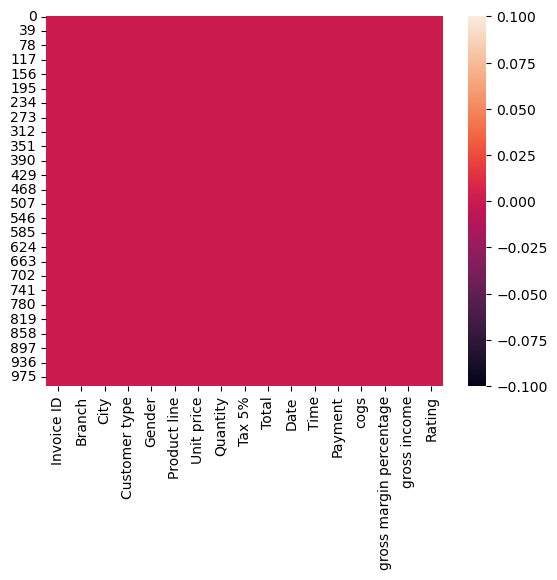

In [19]:
sns.heatmap(df.isnull())

From this : Looks like we dont have any missing value in our datam

### Checking for Duplicaes

In [21]:
duplicates = df.duplicated()

print("Duplicate Rows except first occurrence:")
print(df[duplicates])

Duplicate Rows except first occurrence:
Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Date, Time, Payment, cogs, gross margin percentage, gross income, Rating]
Index: []


There are no duplicates, and each row is unique.

## Checking outliers

Numerical data before removing outliers

In [59]:
for i in numerical_cols_names:
  fig = px.box(numerical_cols, x=i)
  fig.show()

### Removing the Outliers :

In [60]:
df_copy = df.copy()
for col_name in numerical_cols_names:
  df_copy = df_copy[df[col_name] <= df[col_name].quantile(0.98)]

df_copy

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24188\3169051752.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



City Customer type  Gender            Product line  Unit price  \
0       Yangon        Member  Female       Health and beauty       74.69   
1    Naypyitaw        Normal  Female  Electronic accessories       15.28   
2       Yangon        Normal    Male      Home and lifestyle       46.33   
3       Yangon        Member    Male       Health and beauty       58.22   
4       Yangon        Normal    Male       Sports and travel       86.31   
..         ...           ...     ...                     ...         ...   
994  Naypyitaw        Member  Female  Electronic accessories       60.95   
995  Naypyitaw        Normal    Male       Health and beauty       40.35   
997     Yangon        Member    Male      Food and beverages       31.84   
998     Yangon        Normal    Male      Home and lifestyle       65.82   
999     Yangon        Member  Female     Fashion accessories       88.34   

     Quantity   Tax 5%     Total       Date                Time      Payment  \
0           7  26.1415  548.9715 2019-01-05 2023-11-10 13:08:00      Ewallet   
1           5   3.8200   80.2200 2019-03-08 2023-11-10 10:29:00         Cash   
2           7  16.2155  340.5255 2019-03-03 2023-11-10 13:23:00  Credit card   
3           8  23.2880  489.0480 2019-01-27 2023-11-10 20:33:00      Ewallet   
4           7  30.2085  634.3785 2019-02-08 2023-11-10 10:37:00      Ewallet   
..        ...      ...       ...        ...                 ...          ...   
994         1   3.0475   63.9975 2019-02-18 2023-11-10 11:40:00      Ewallet   
995         1   2.0175   42.3675 2019-01-29 2023-11-10 13:46:00      Ewallet   
997         1   1.5920   33.4320 2019-02-09 2023-11-10 13:22:00         Cash   
998         1   3.2910   69.1110 2019-02-22 2023-11-10 15:33:00         Cash   
999         7  30.9190  649.2990 2019-02-18 2023-11-10 13:28:00         Cash   

       cogs  gross margin percentage  gross income  Rating  year      Days  \
0    522.83                 4.761905       26.1415     9.1  2019  Saturday   
1     76.40                 4.761905        3.8200     9.6  2019    Friday   
2    324.31                 4.761905       16.2155     7.4  2019    Sunday   
3    465.76                 4.761905       23.2880     8.4  2019    Sunday   
4    604.17                 4.761905       30.2085     5.3  2019    Friday   
..      ...                      ...           ...     ...   ...       ...   
994   60.95                 4.761905        3.0475     5.9  2019    Monday   
995   40.35                 4.761905        2.0175     6.2  2019   Tuesday   
997   31.84                 4.761905        1.5920     7.7  2019  Saturday   
998   65.82                 4.761905        3.2910     4.1  2019    Friday   
999  618.38                 4.761905       30.9190     6.6  2019    Monday   

        month  weekday  hour  
0     January        5    13  
1       March        4    10  
2       March        6    13  
3     January        6    20  
4    February        4    10  
..        ...      ...   ...  
994  February        0    11  
995   January        1    13  
997  February        5    13  
998  February        4    15  
999  February        0    13  

[959 rows x 20 columns]

Numerical data after removing outliers

In [61]:
for i in numerical_cols_names:
  fig = px.box(df_copy[numerical_cols_names], x=i)
  fig.show()

## Checking correlation

<AxesSubplot:>

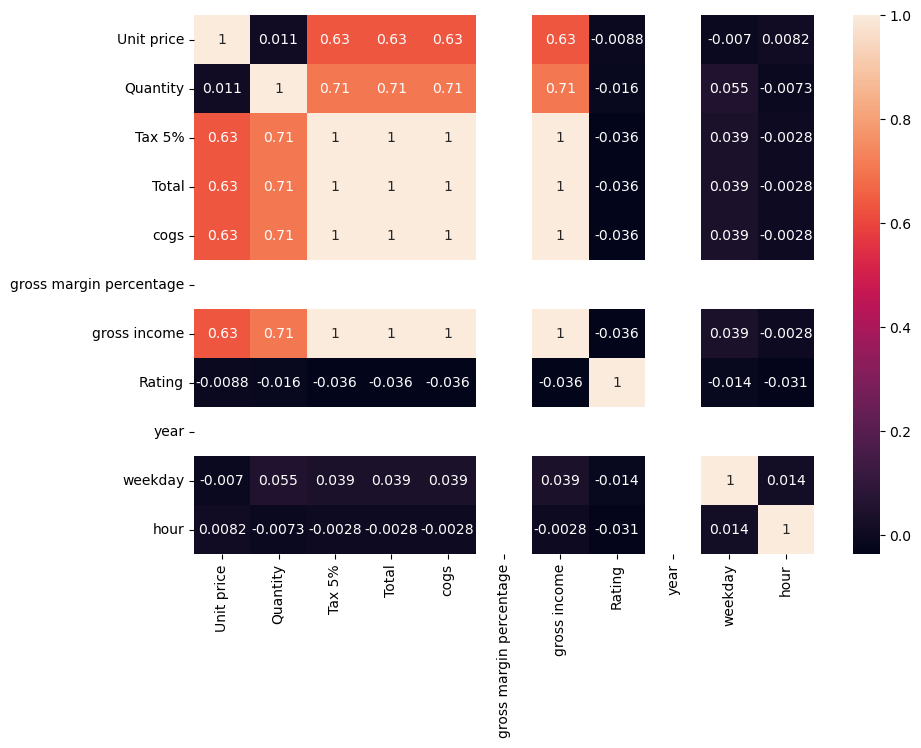

In [62]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

OR

In [63]:
df.describe().T

count         mean           std          min  \
Unit price               1000.0    55.672130  2.649463e+01    10.080000   
Quantity                 1000.0     5.510000  2.923431e+00     1.000000   
Tax 5%                   1000.0    15.379369  1.170883e+01     0.508500   
Total                    1000.0   322.966749  2.458853e+02    10.678500   
cogs                     1000.0   307.587380  2.341765e+02    10.170000   
gross margin percentage  1000.0     4.761905  6.131498e-14     4.761905   
gross income             1000.0    15.379369  1.170883e+01     0.508500   
Rating                   1000.0     6.972700  1.718580e+00     4.000000   
year                     1000.0  2019.000000  0.000000e+00  2019.000000   
weekday                  1000.0     3.032000  1.973543e+00     0.000000   
hour                     1000.0    14.910000  3.186857e+00    10.000000   

                                 25%          50%          75%          max  
Unit price                 32.875000    55.230000    77.935000    99.960000  
Quantity                    3.000000     5.000000     8.000000    10.000000  
Tax 5%                      5.924875    12.088000    22.445250    49.650000  
Total                     124.422375   253.848000   471.350250  1042.650000  
cogs                      118.497500   241.760000   448.905000   993.000000  
gross margin percentage     4.761905     4.761905     4.761905     4.761905  
gross income                5.924875    12.088000    22.445250    49.650000  
Rating                      5.500000     7.000000     8.500000    10.000000  
year                     2019.000000  2019.000000  2019.000000  2019.000000  
weekday                     1.000000     3.000000     5.000000     6.000000  
hour                       12.000000    15.000000    18.000000    20.000000

## Exploring Dataset

Visualizing the initial trends

### Pairplot for few columns

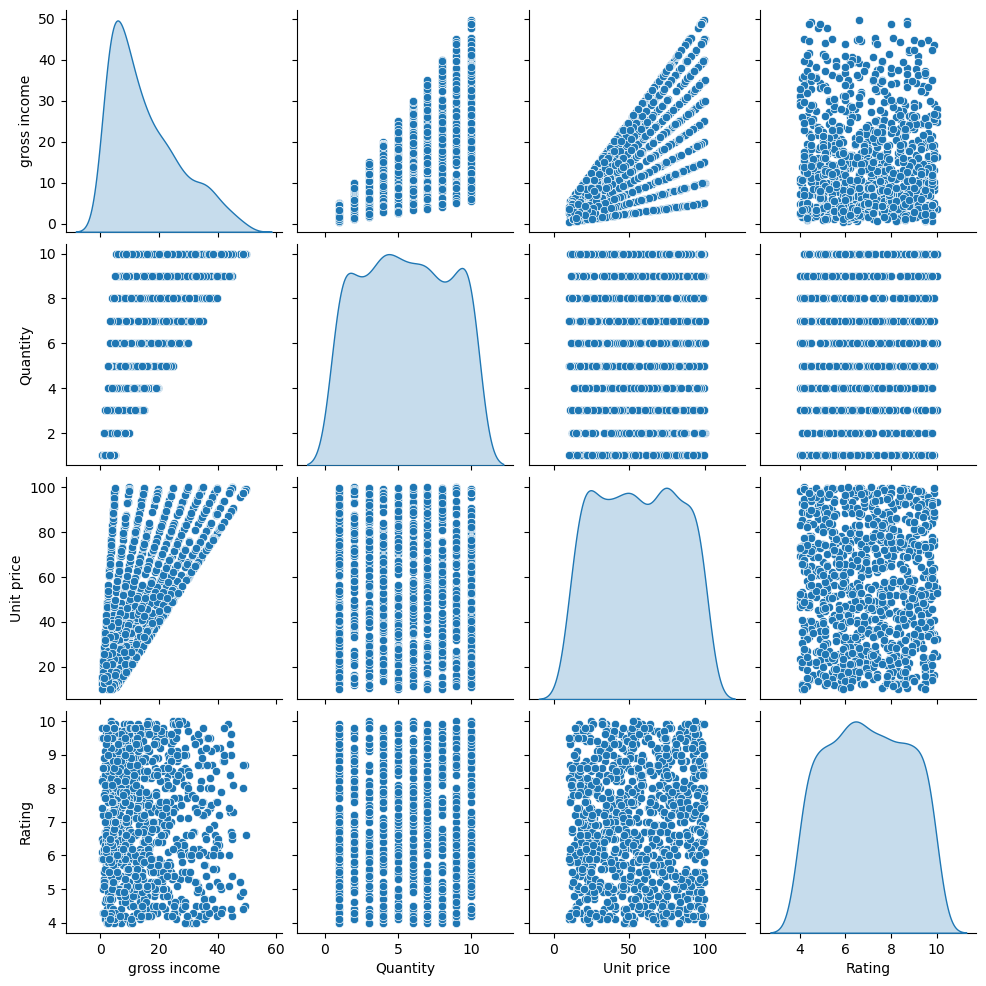

In [66]:
sns.pairplot(df[["gross income", "Quantity", "Unit price", "Rating"]], diag_kind="kde")

### Hisstogram for few important columns

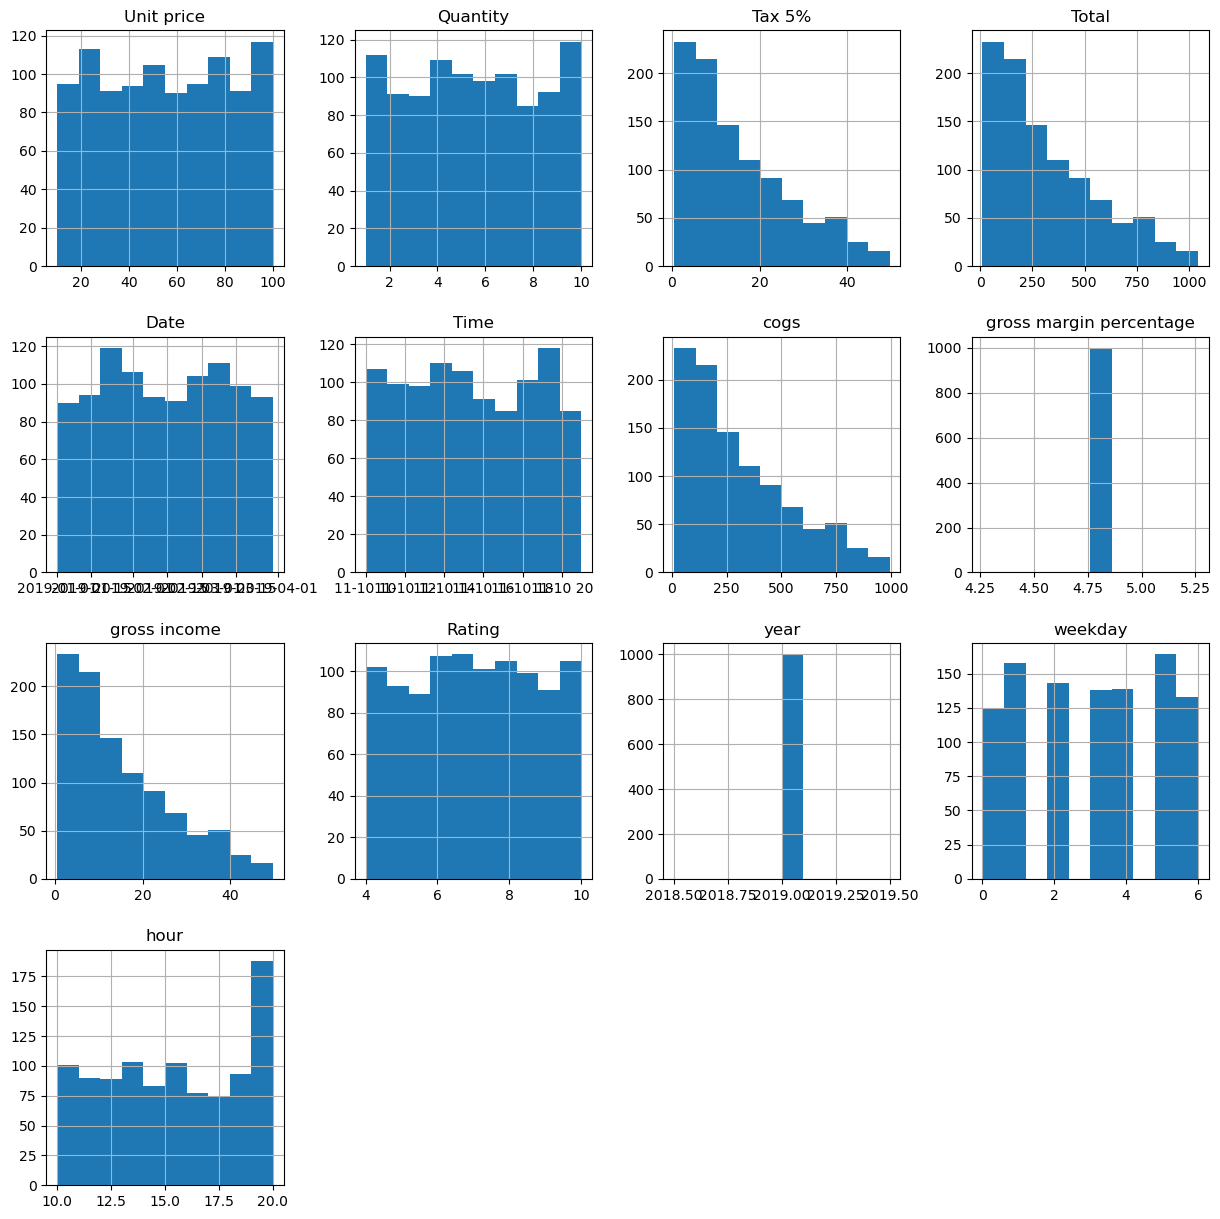

In [67]:
df.hist(figsize=(15,15))
plt.show()

### Payment Channel by City

Text(0.5, 1.0, 'Payment Channel by City')

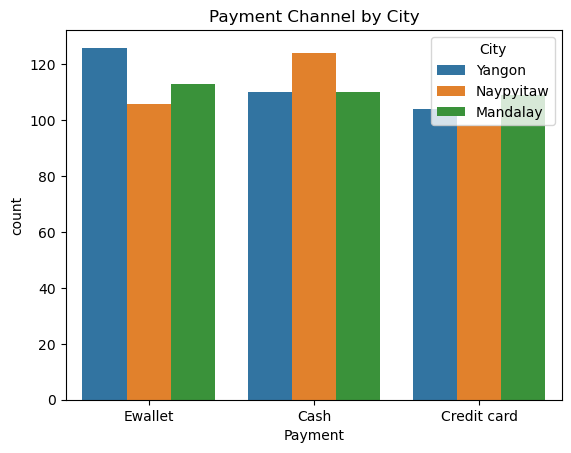

In [70]:
sns.countplot(x="Payment", hue = "City", data =df).set_title("Payment Channel by City") 

### Payment per product line 

Text(0.5, 1.0, 'Payment per Product line ')

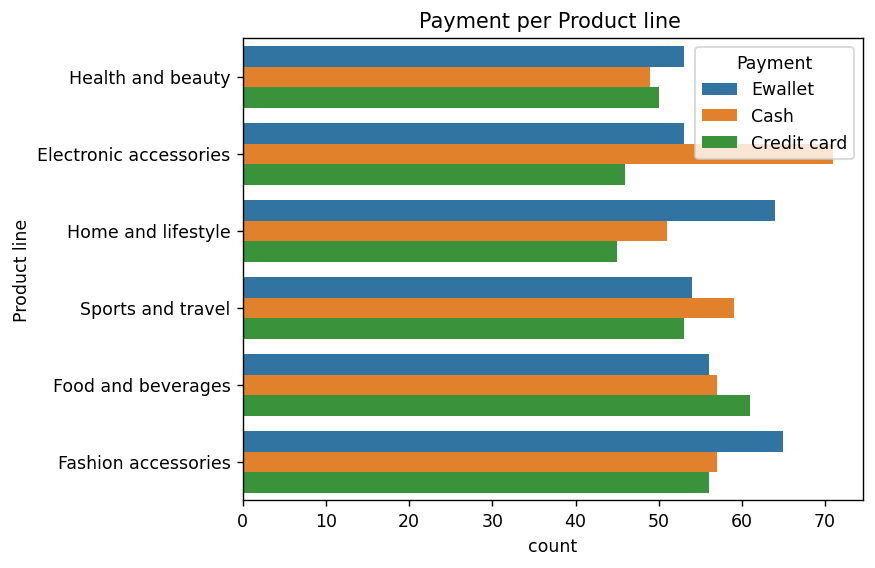

In [71]:
plt.figure(dpi=125)
sns.countplot(y = "Product line",  hue = "Payment", data =df).set_title('Payment per Product line ')

# UNIVARIATE ANALYSIS

Creating a function for certain graphs and plots rather than typing the code each time. 

Creating function to visualized categorical column using count plot.

In [111]:
def count_plot(x_axis, hue = None, rotation = 90):
    """
    1) input : x_axis, column name, data type must be object or categorical
    3) output : cout plot using seaborn modules, unique values in x-axis and frequency in y-axis
    4) use bar_label to show frequency of each unique values above each column in graph
    """
    graph = sns.countplot(x = x_axis, data = df, hue = hue, order = df[x_axis].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)
        
        
    plt.xticks(rotation = rotation)
    plt.show()

creating function that visualizes categorical column using pie plot.

In [92]:
def pie_plot(column_name):
    """
    1) input : column name, column data type must be object or categorical
    2) output : circle chart that shows size of each unique values and percentage 
    """
    plt.pie(df[column_name].value_counts(), labels = df[column_name].value_counts().index, shadow = True, autopct = "%1.1f%%")
    plt.show()

creating function that visualizes numeric columns using box plot.

In [88]:
def box_plot(x_axis = None, y_axis = None, hue = None, col = None):
    """
    input : x_axis, y_axis and hue column, column data type must be numeric in y_axis
    output : box plot to see distribution of column values such as min,max,mean,medien,std
    """
    sns.catplot(x = x_axis, y = y_axis, data = df, hue = hue, kind = "box", col = col)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()

### Discovering City column

In [89]:
df["City"].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

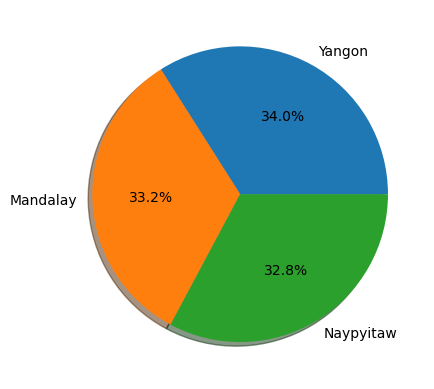

In [93]:
pie_plot("City")

From this, we can say that:

- We have 3 Branches "Yangon", "Mandalay" and "Napyitaw"
- City Yangon has largest Sales numbers
- City Napyitaw has fewest Sales numbers

### Discovering Customer type column

In [95]:
df["Customer type"].unique()

array(['Member', 'Normal'], dtype=object)

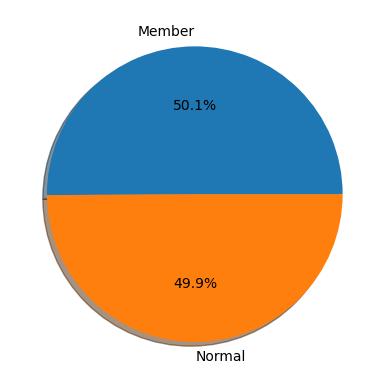

In [96]:
pie_plot("Customer type")

From the above :

- Most people come to shop has the member card.

### Discovering Gender column

In [97]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

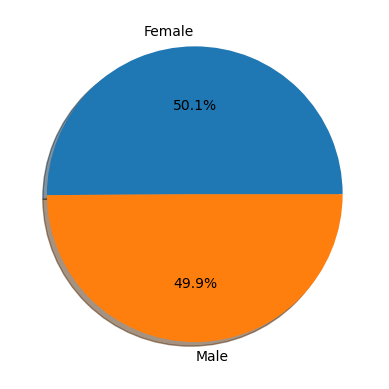

In [98]:
pie_plot("Gender")

We can see that:

- Most Gender Come to branches is female
- But there is no huge difference between them, they are nearly equal.

### Discovering Product line column

In [99]:
df["Product line"].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [108]:
plt.figure(figsize = (45,15))

<Figure size 4500x1500 with 0 Axes>

<Figure size 4500x1500 with 0 Axes>

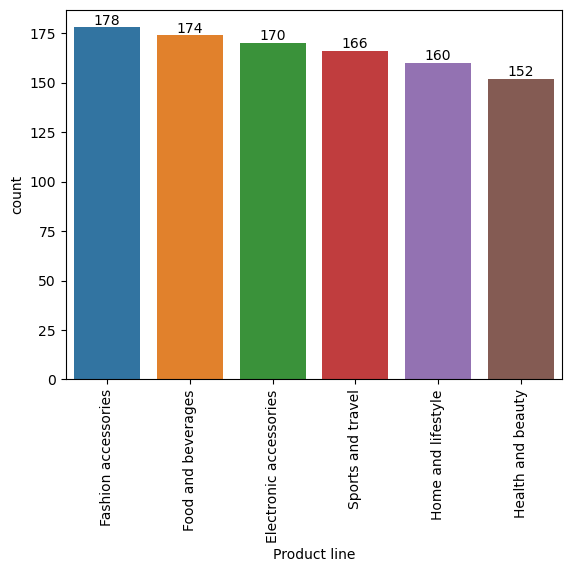

In [112]:
count_plot("Product line") 

We can see that :

- Most sales in branches is "Fashion accessories"
- Lest sales in branches is "Health and beauty"

### Discovering Payment column

In [113]:
df["Payment"].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

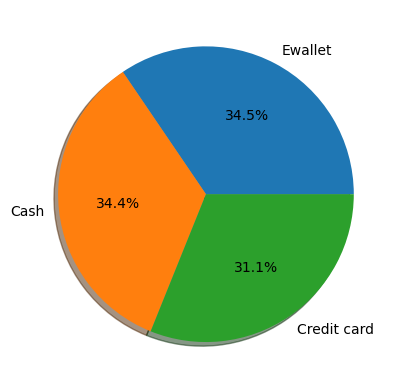

In [114]:
pie_plot("Payment")

From the above

- Customers prefered to Ewallet,cash payments

### Discovering Rating column

In [115]:
df["Rating"].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

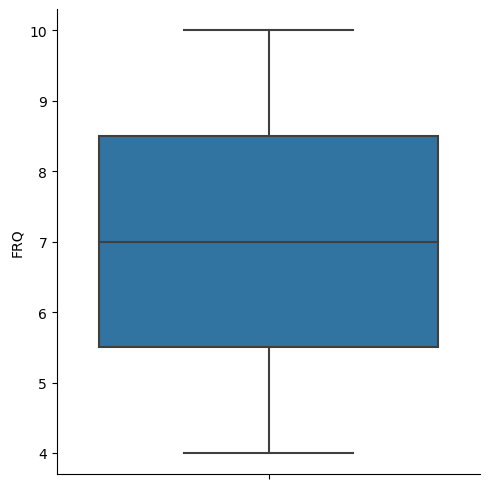

In [116]:
box_plot(y_axis = "Rating")

From the above  :

- Average rating across products is approximately 7

### Discovering Month column

In [119]:
df["month"].unique()

array(['January', 'March', 'February'], dtype=object)

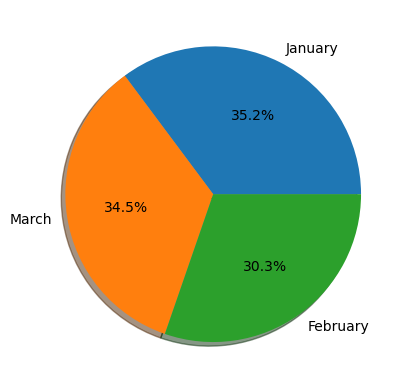

In [121]:
pie_plot("month")

From the above plot, we can say that:

- Most sales in "january" month

Peak Hour

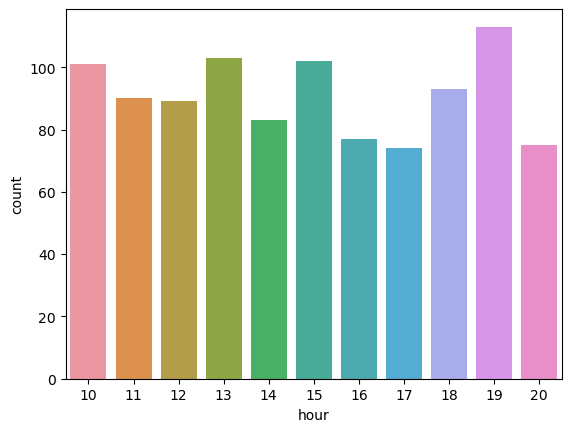

In [190]:
sns.countplot(x="hour",data=df);

From this :
- Checking above data we can find that peak hour is 19 which is 7"O"clock so with help of this information staff of company manage their breaks.

# BIVARIATE ANALYSIS 

1) There is relationship between gross income and customer ratings ?

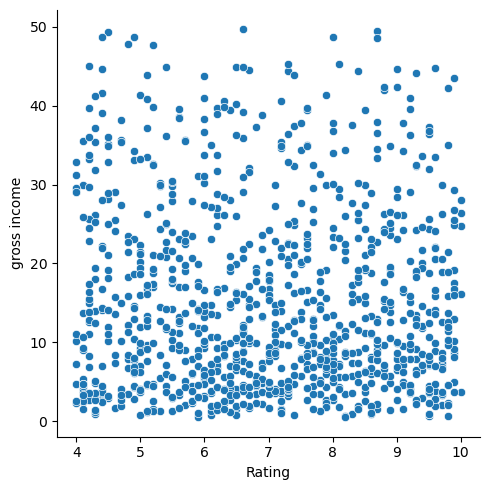

In [124]:
sns.relplot(x = "Rating", y = "gross income", data = df, kind = "scatter")
plt.show()

- No relationship between rating and gross income

2) What is Gross Income of each branch ?  

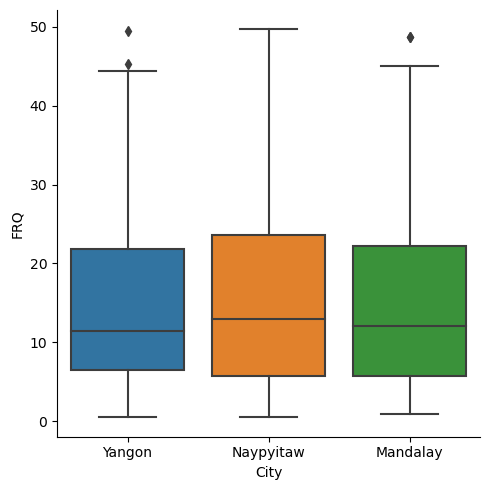

In [126]:
box_plot(x_axis = "City", y_axis = "gross income")

- Branch C stands out slightly with higher income compared to Branch A and B. Despite Branch A having slightly higher sales, it is Branch C that emerges as the most profitable branch in terms of gross income

3) See Gender come to branches

In [127]:
plt.figure(figsize = (15,6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

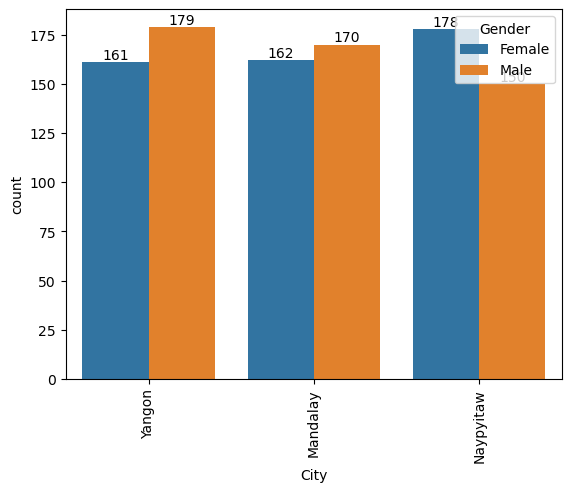

In [128]:
count_plot(x_axis = "City", hue = "Gender") 

- Branch Yangon,Mandalay has males greater than females, but branch Naypyitaw  has females greater than males

4) What is male and female gross income in each branch ?

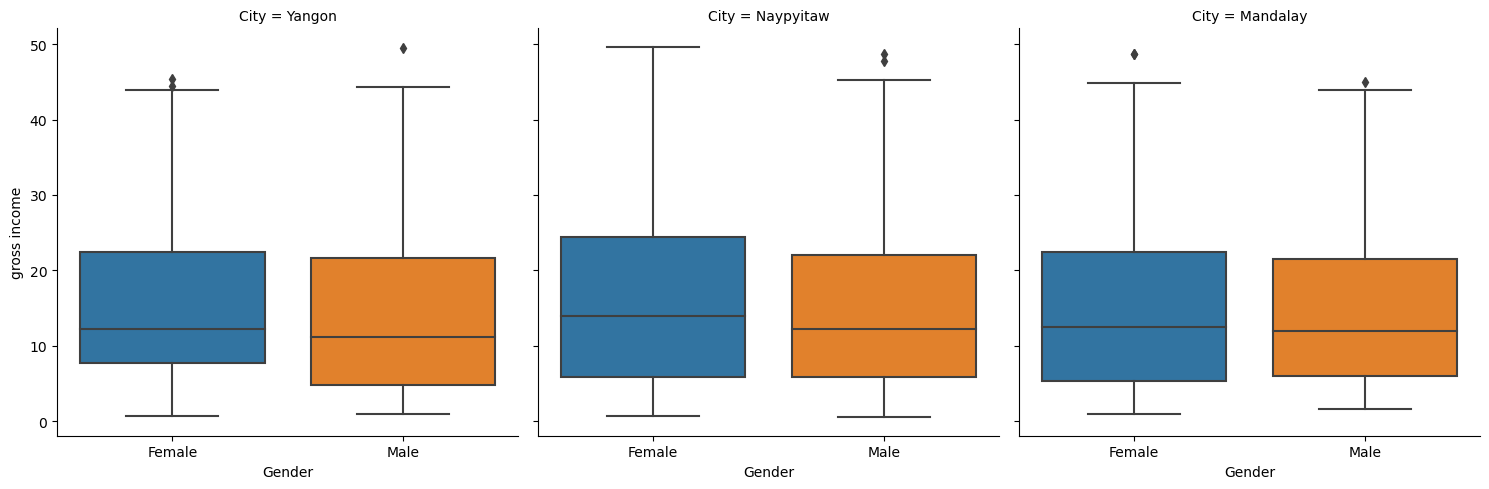

In [129]:
box_plot(x_axis = "Gender", y_axis = "gross income", col = "City")

- "Female" gross income greater than Male in each branch

5) See sales product line in branches

In [133]:
plt.figure(figsize=(18,8))

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

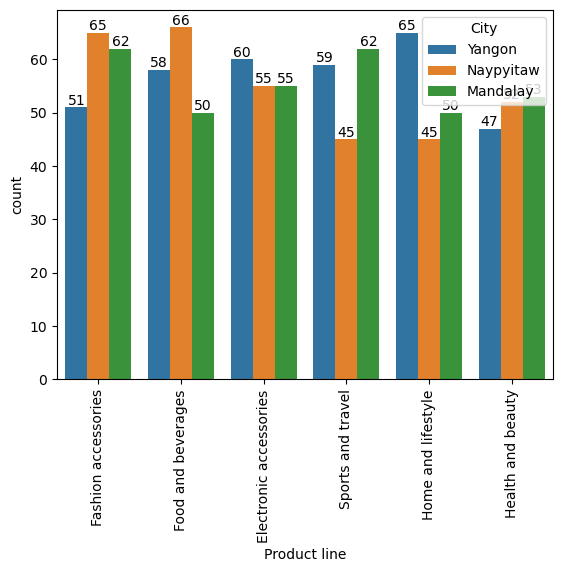

In [131]:
count_plot(x_axis = "Product line", hue = "City")

From above
- "Electronic accessories", "Home and lifestyle" is the most sales in branch Yangon
- "Health and beauty", "Sports and travel" is the most sales in branch Naypyitaw
- "Food and beverages", "Fashion accessories" is the most sales in branch Mandalay

6) What is number of customer type of each branch ?

In [135]:
plt.figure(figsize=(15,7))

<Figure size 1500x700 with 0 Axes>

<Figure size 1500x700 with 0 Axes>

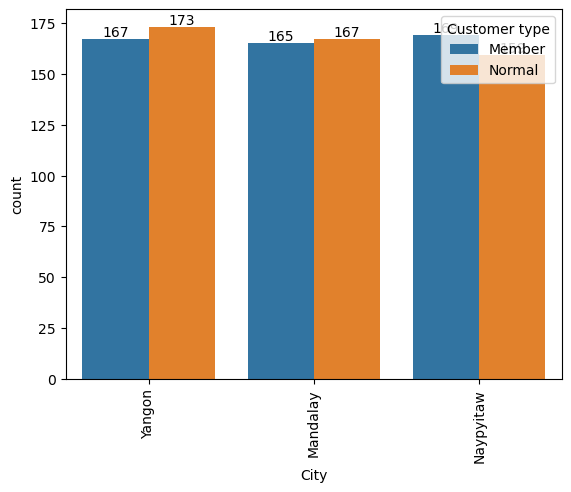

In [136]:
count_plot(x_axis = "City", hue = "Customer type")

From above
- Branch Yangon, Normal customer greater than Member
- Branch Mandalay, Normal customer greater than Member
- Branch Naypyitaw, Member customer greater than Normal

When  number of members in Branch increased,Total of gross income increased

7.Boxplot between Gender and Gross income and explain the results?

Text(0.5, 1.0, 'Relationship b/w Gender and gross income')

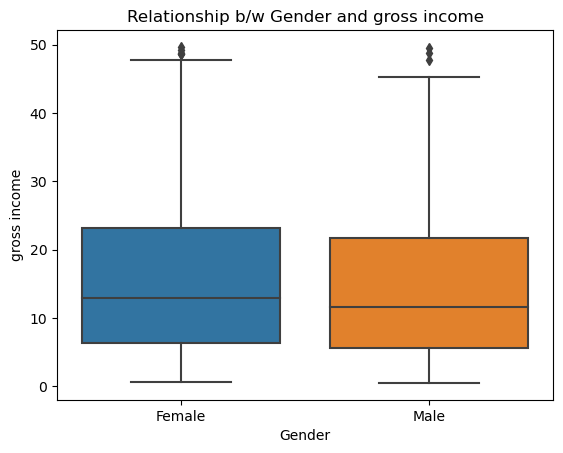

In [137]:
sns.boxplot(x='Gender',y='gross income',data=df) 
plt.title("Relationship b/w Gender and gross income")

Explanation:
- Female contribution are more in Gross income of supermarkets than male

8.What is the spending pattern of both males and females, meaning in which category do they spend more?

Text(0, 0.5, 'Total sales')

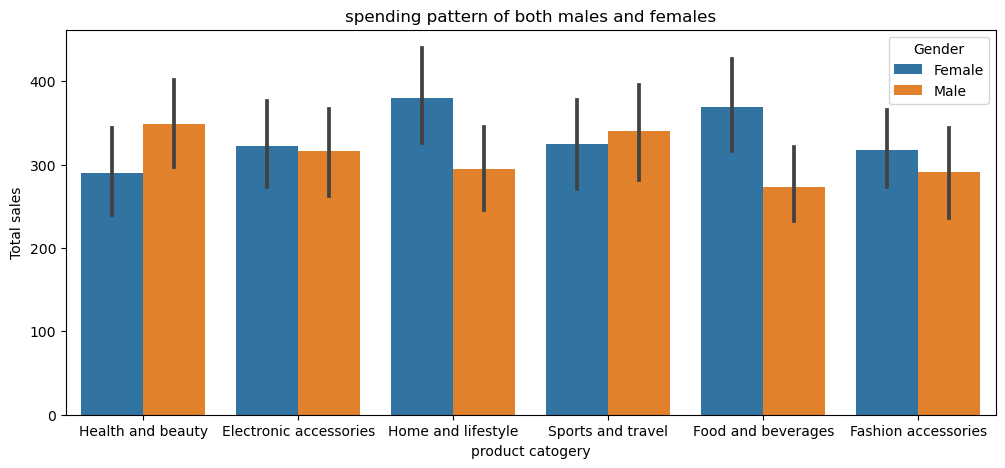

In [164]:
plt.figure(figsize=(12,5))
sns.barplot(x="Product line", y="Total",hue='Gender' ,data=df)
plt.title("spending pattern of both males and females")
plt.xlabel("product catogery")
plt.ylabel("Total sales")

Explanation:

- Female are buying more Home and lifestyle product
- Male are buying more Health and beauty and Sports and travel products.

9. Which day of the week has maximum sales

Text(0, 0.5, 'Total sales')

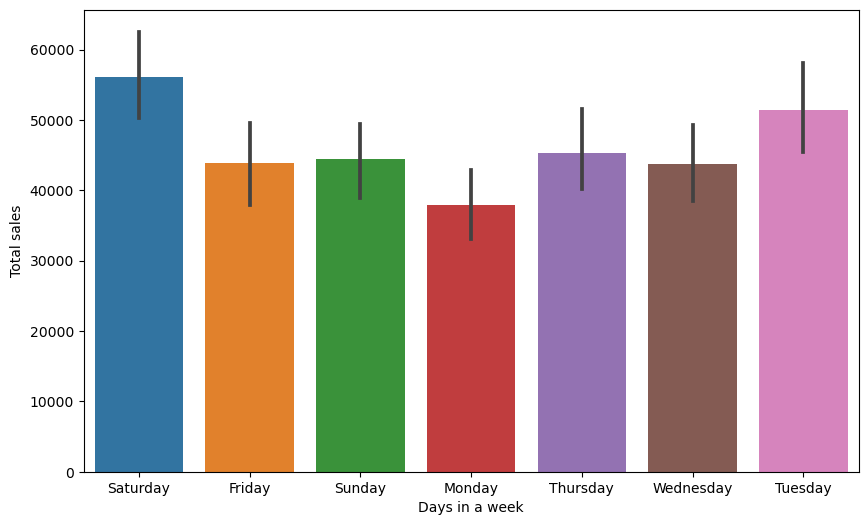

In [168]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Days', y = 'Total', data = df,estimator=sum)
plt.xlabel("Days in a week")
plt.ylabel("Total sales")

Explanation:

- Maximum sales are on Saturday and least sales on Monday

10. Find the hot selling month

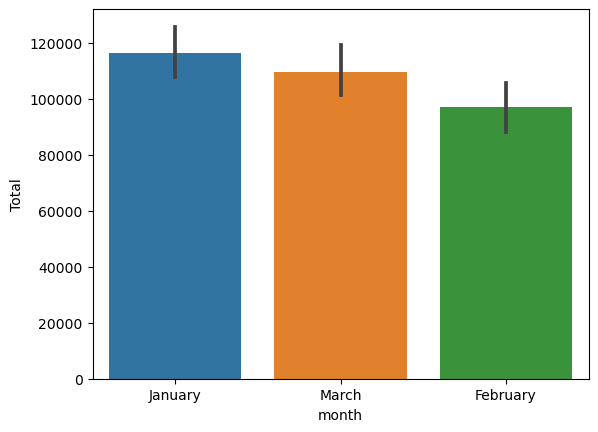

In [181]:
sns.barplot(x="month",y="Total",data=df,estimator=sum);

From this :
- Hot selling month is january so it means we can give more offers on products on the month of january to increase more sale and also we can extend the offer till march month because there is not much difference between month january , february and march 

11. Find the Hot selling month of each City/branch

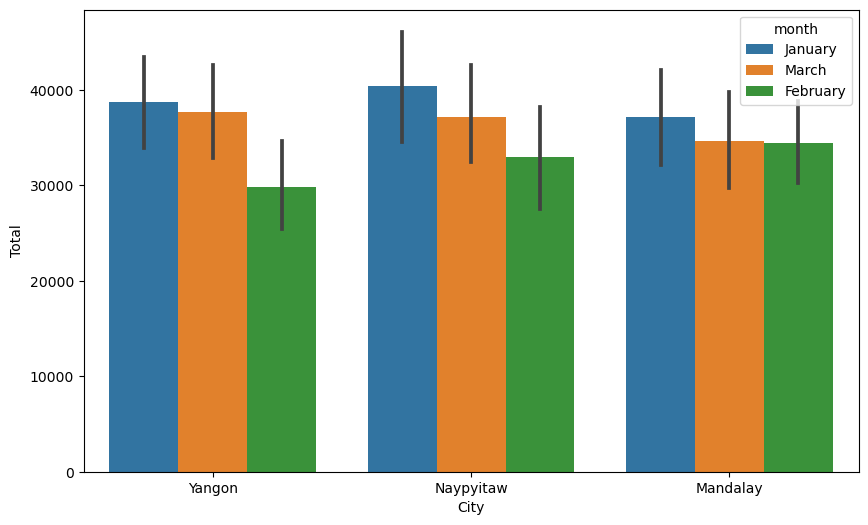

In [182]:
plt.figure(figsize=(10,6))
sns.barplot(x="City",y="Total",data=df,estimator=sum,hue="month");


From this : 
- From above output we found that january month is hot selling month of each branch so with more offers in january we also have to increase our stock and workforce. 

12.Find the avg total max min sale of each month at each branch

In [183]:
df.groupby(["City","month"])["Total"].agg(["sum","mean","max","min"])

sum        mean       max      min
City      month                                              
Mandalay  February  34424.2710  315.819000   853.146  30.9960
          January   37176.0585  334.919446  1022.385  18.6375
          March     34597.3425  308.904844  1022.490  26.7225
Naypyitaw February  32934.9825  329.349825  1042.650  10.6785
          January   40434.6810  331.431811  1034.460  13.4190
          March     37199.0430  350.934368   943.299  17.0940
Yangon    February  29860.1205  317.660856  1039.290  19.2465
          January   38681.1285  325.051500   931.035  12.6945
          March     37659.1215  296.528516   951.825  16.2750

OR

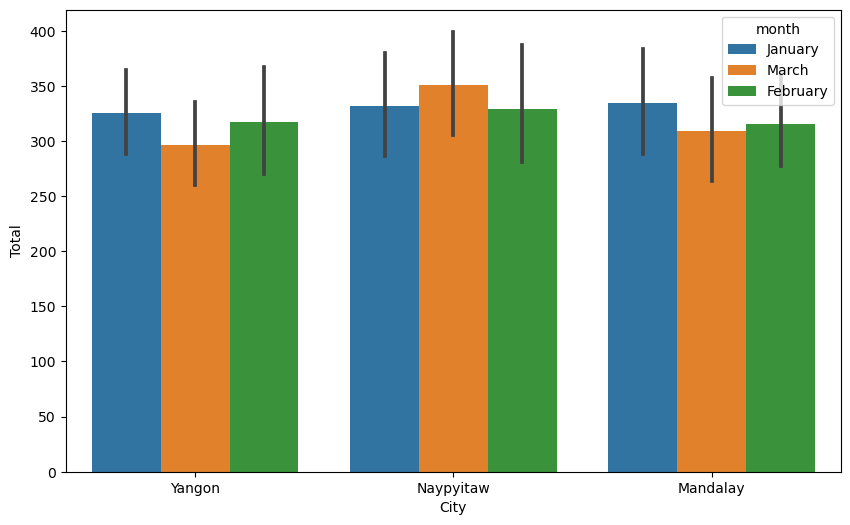

In [184]:
plt.figure(figsize=(10,6))
sns.barplot(x="City",y="Total",data=df,hue="month");

From this:
   - From above out we can see that on month of march average sale on Naypyitaw is more that january  

13. Find the sale trend of the company over the three months 

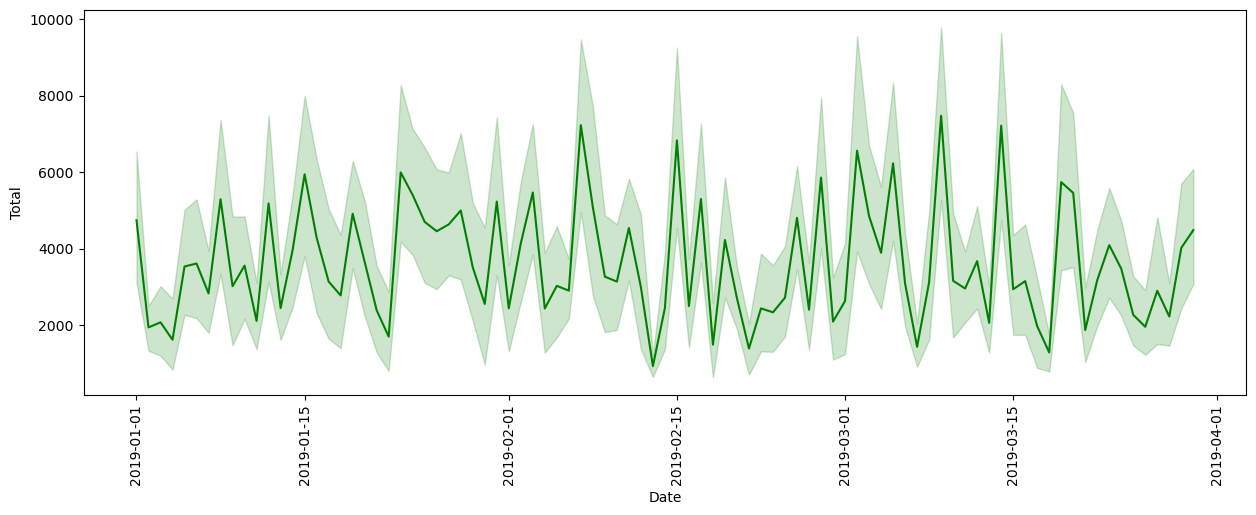

In [185]:
plt.figure(figsize=(15,5))
sns.lineplot(x="Date",y="Total",data=df,color="green",estimator=sum)
plt.xticks(rotation=90);


14.hot selling day of each branch of each city

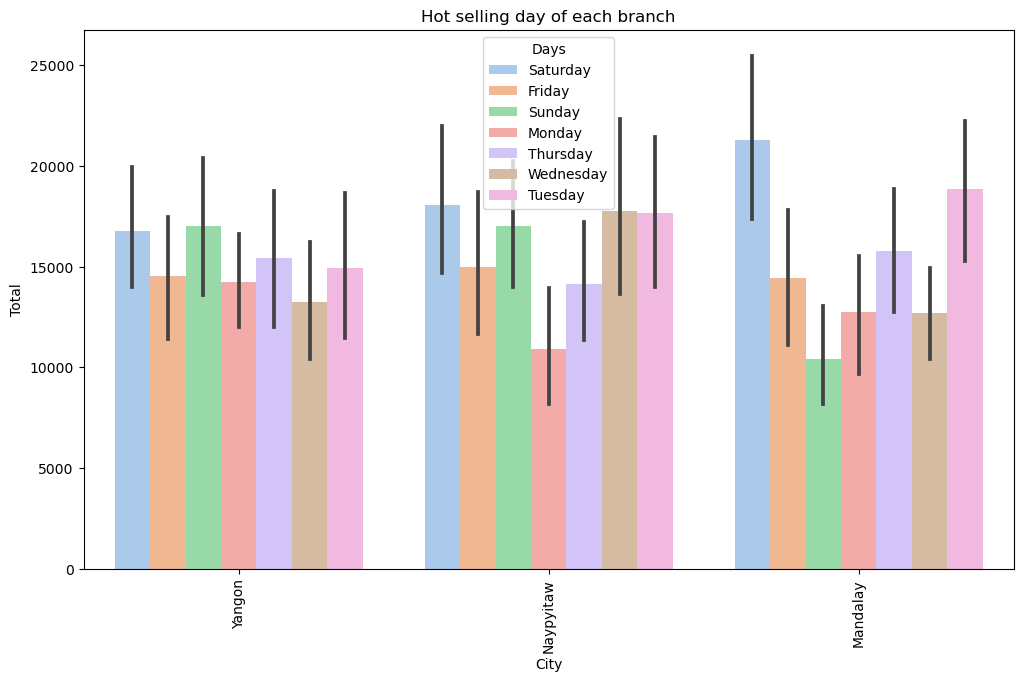

In [186]:
plt.figure(figsize=(12,7))
sns.barplot(x="City",y="Total",data=df,estimator=sum,palette="pastel",hue="Days")
plt.xticks(rotation=90)
plt.title("Hot selling day of each branch");


15. find the sale trend of each branch with respect to date

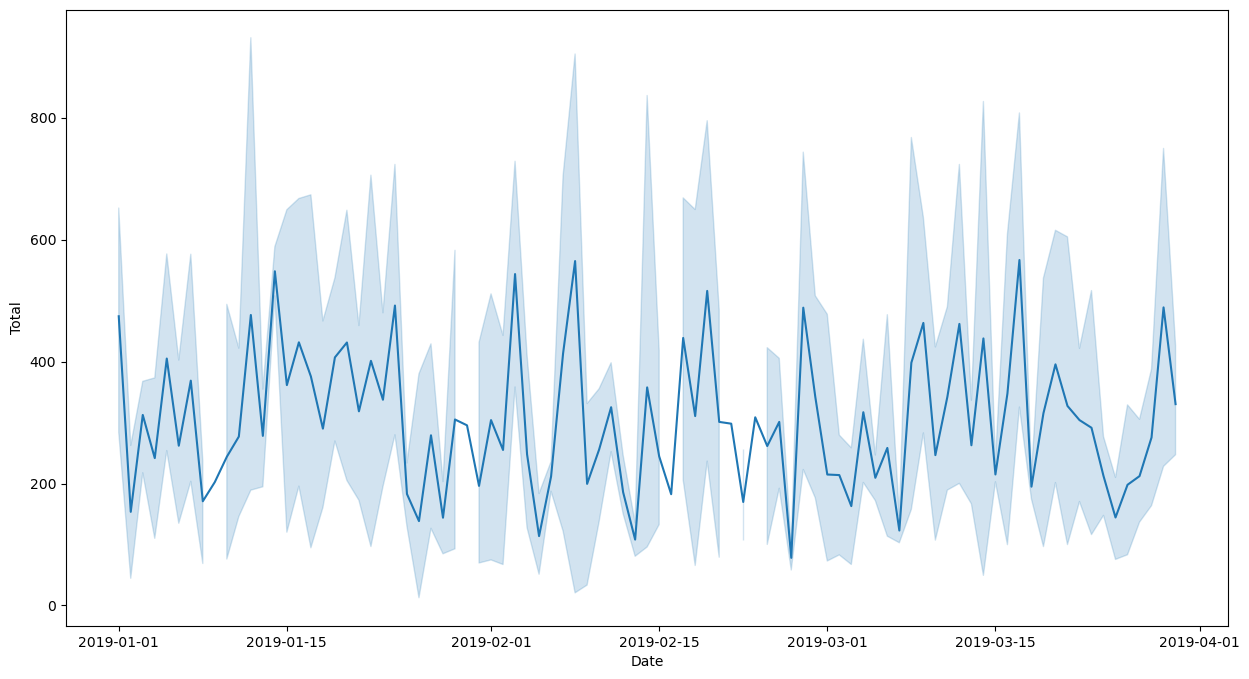

In [187]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df[df['City']=='Yangon']['Date'],y=df[df['City']=='Yangon']['Total']);

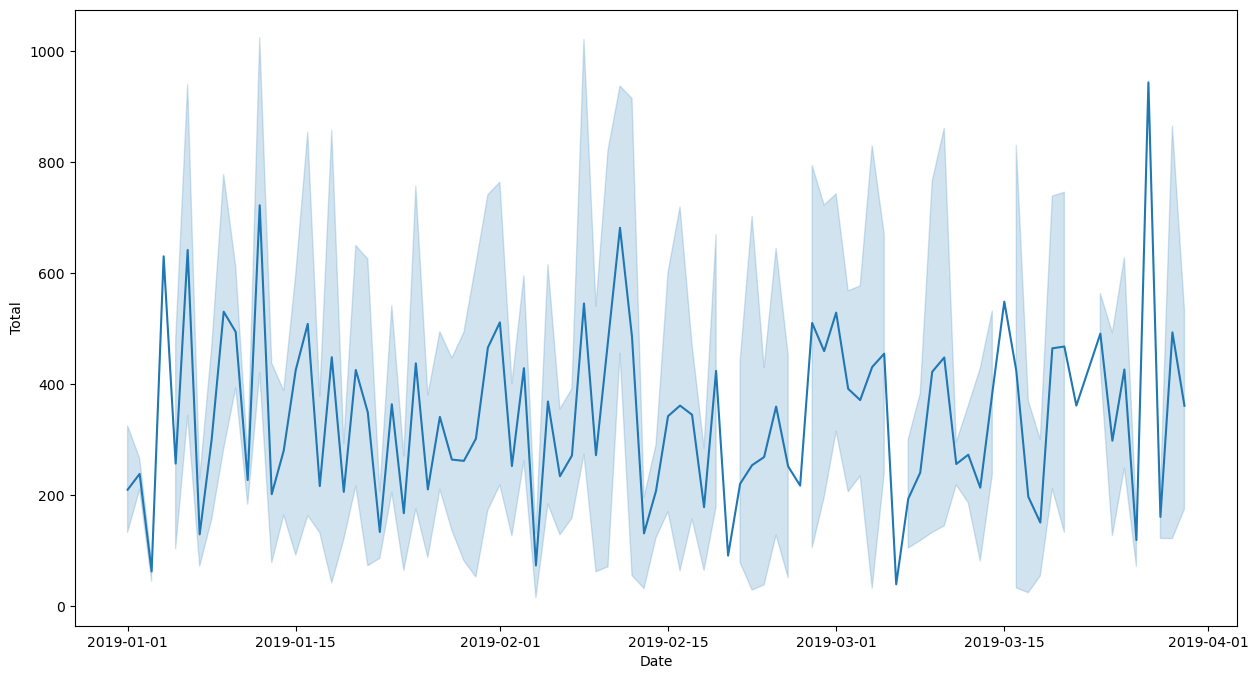

In [188]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df[df['City']=='Naypyitaw']['Date'],y=df[df['City']=='Naypyitaw']['Total']);

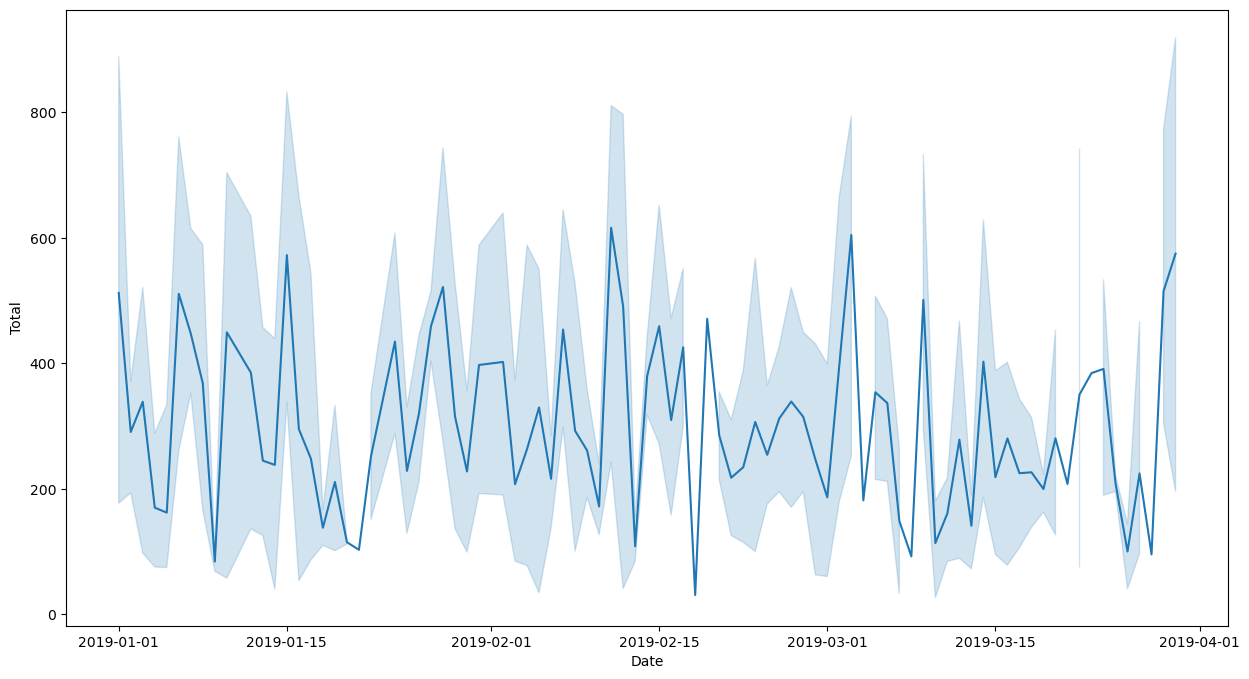

In [189]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df[df['City']=='Mandalay']['Date'],y=df[df['City']=='Mandalay']['Total']);

16. find the hotselling day 

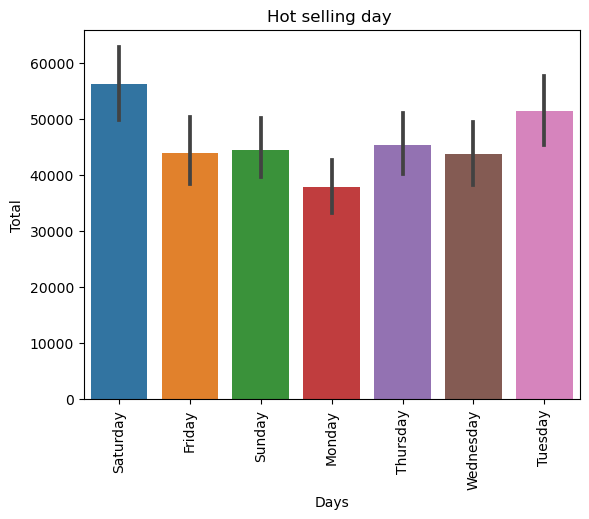

In [191]:
sns.barplot(x="Days",y="Total",data=df,estimator=sum)
plt.xticks(rotation=90)
plt.title("Hot selling day ");

OR

In [192]:
df.groupby(["Days"])["Total"].agg(["sum"]).reset_index().sort_values(by="sum",ascending=False)

Days         sum
2   Saturday  56120.8095
5    Tuesday  51482.2455
4   Thursday  45349.2480
3     Sunday  44457.8925
0     Friday  43926.3405
6  Wednesday  43731.1350
1     Monday  37899.0780

From this :
   - Checking above data we can find that hot seeling day is saturday which is weekend 

18. find the most populted product of the company 

In [193]:
df["Product line"].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

OR

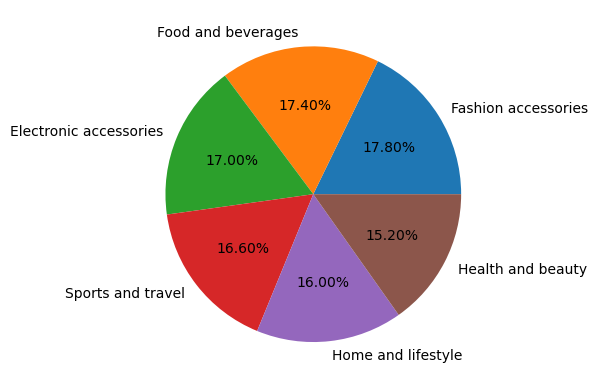

In [194]:
plt.pie(df["Product line"].value_counts().values,labels=df["Product line"].value_counts().index,autopct="%.2f%%");

From this: 
   - We can see that fashion accessories is top selling product of company.

19. find the most populated product of the company of each month 

<AxesSubplot:xlabel='City', ylabel='count'>

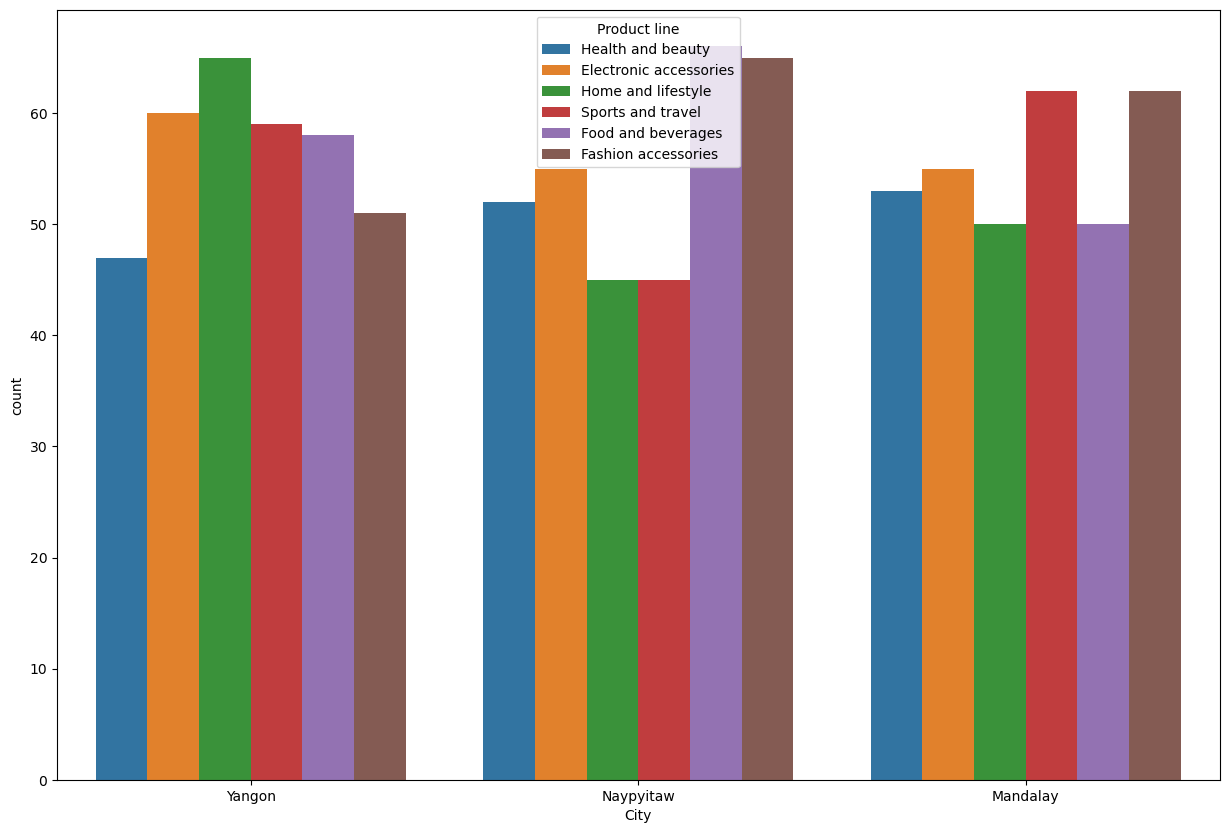

In [195]:
plt.figure(figsize=(15,10))
sns.countplot(x="City",data=df,hue="Product line")

20. Find the peak hour of every branch

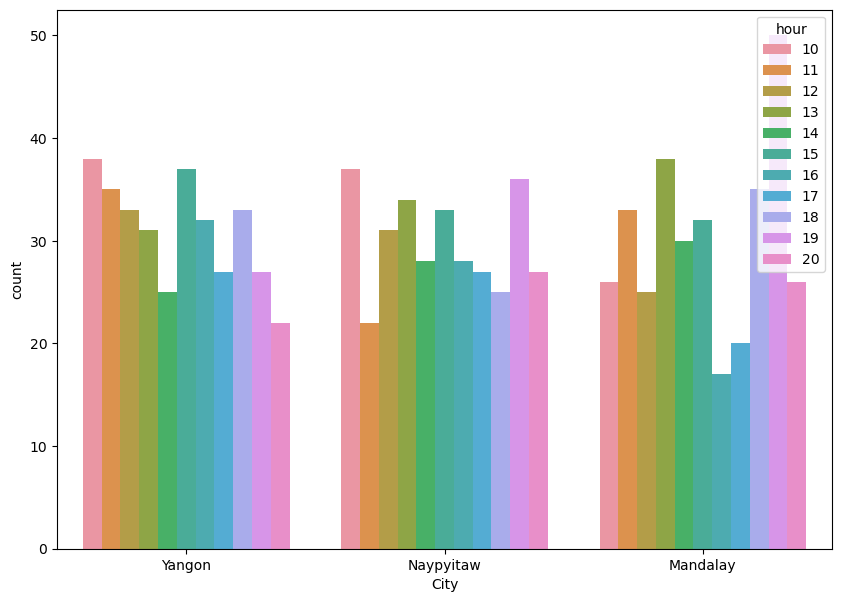

In [196]:
plt.figure(figsize=(10,7))
sns.countplot(x="City",data=df,hue="hour");

From this:
  - from customer point of view customer have interest different products of each branch.
- from business point of view that branch should maintain the availaiblity of that products.

21. Most revenue generated hour

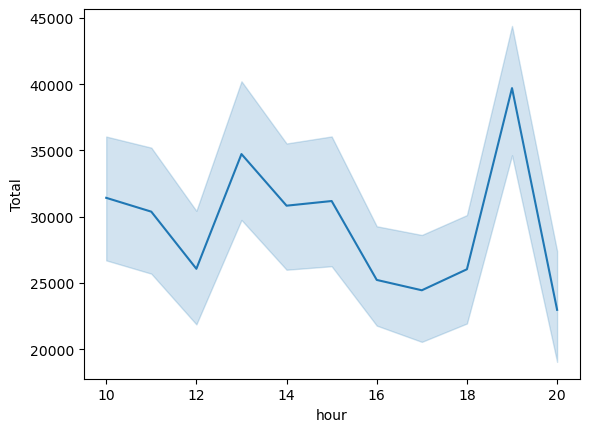

In [197]:
sns.lineplot(x="hour",y="Total",data=df,estimator=sum);

22. Which type of customers giving more sale

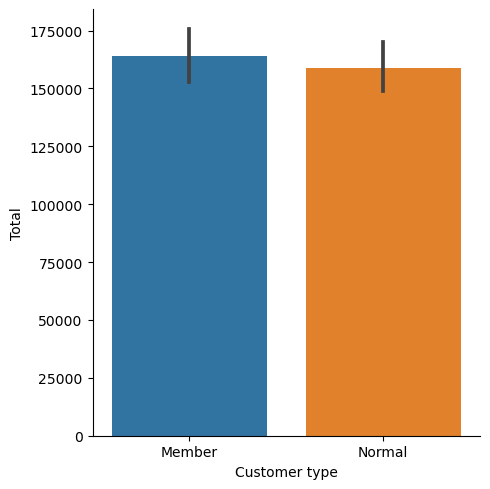

In [199]:
sns.catplot(x="Customer type",y="Total",data=df,kind="bar",estimator=sum);

# MULTIVARIATE ANALYSIS

### Which type of cx giving more sale branch wise

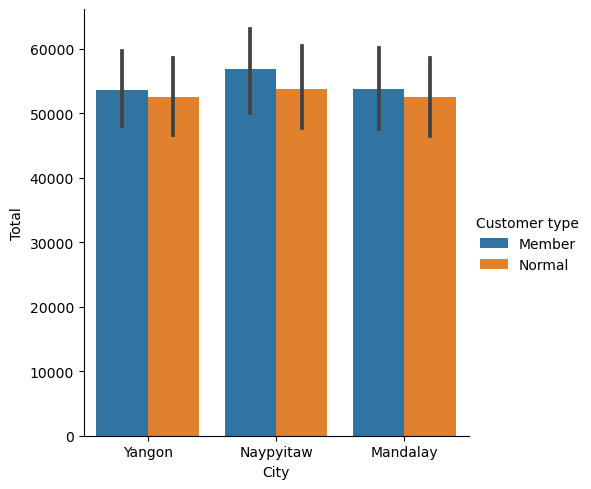

In [200]:
sns.catplot(x="City",y="Total",data=df,kind="bar",estimator=sum,hue="Customer type");

### which mode of payment is most likely used by the customers branch wise

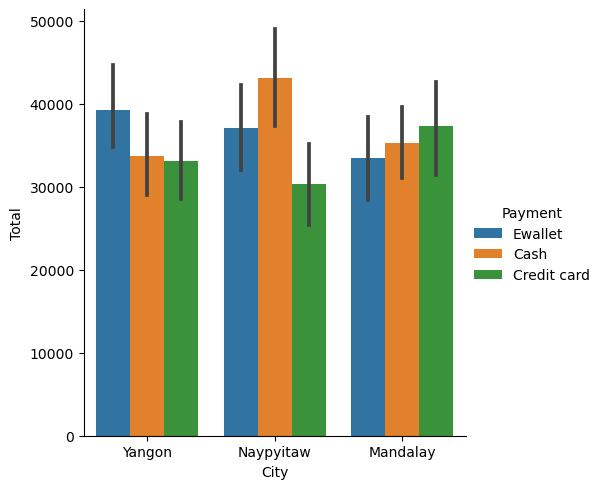

In [201]:
sns.catplot(x="City",y="Total",data=df,hue="Payment",kind="bar",estimator=sum);

From this:
- Checking above data we can convert cash payment customers into credit card by giving them offers to increase the mode of paymnet of credit 

### Heat map for Product line , Quantity and Total

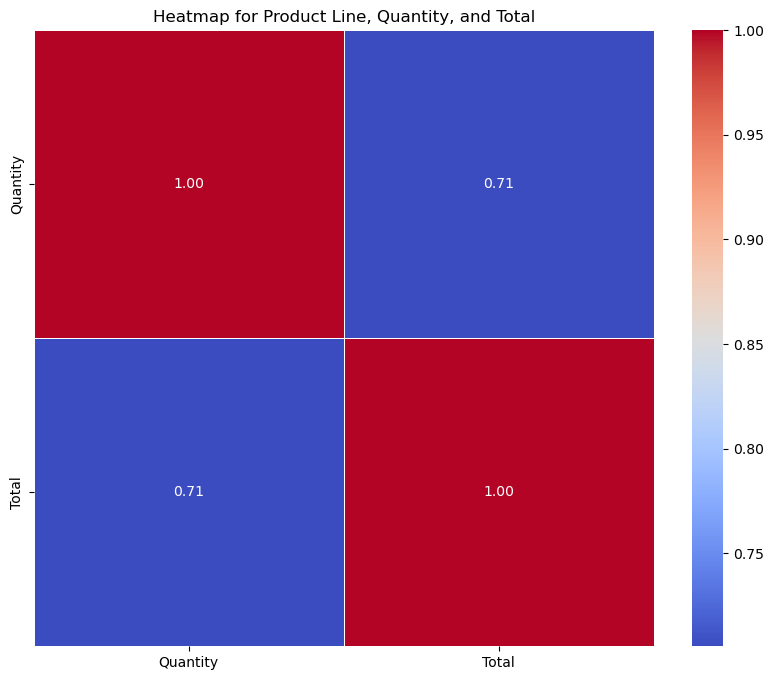

In [204]:
variables_for_heatmap = ['Product line', 'Quantity', 'Total']

subset_df = df[variables_for_heatmap]

plt.figure(figsize=(10, 8))
heatmap_data = subset_df.corr()
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap for Product Line, Quantity, and Total')
plt.show()

In [206]:
df.columns

Index(['City', 'Customer type', 'Gender', 'Product line', 'Unit price',
       'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'year', 'Days',
       'month', 'weekday', 'hour', 'Purchasing_time'],
      dtype='object')

### Scatter Plot Matrix for Total, Quantity, and Rating

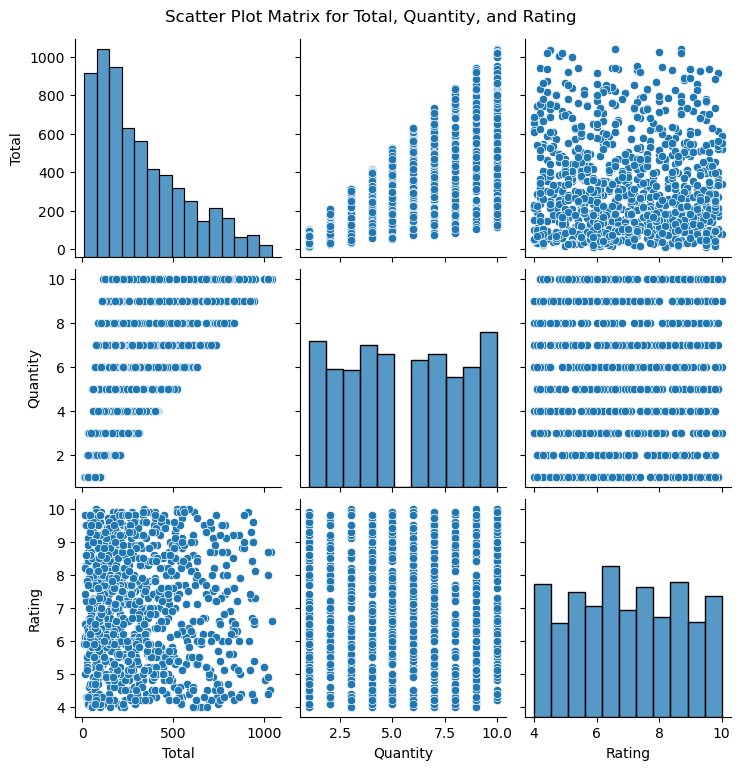

In [208]:
columns_for_scatter_matrix = ['Total', 'Quantity', 'Rating']

subset_df = df[columns_for_scatter_matrix]

sns.pairplot(subset_df)
plt.suptitle('Scatter Plot Matrix for Total, Quantity, and Rating', y=1.02)
plt.show()

### How does the distribution of total sales vary across different product lines for each branch, and does it differ based on the customer type?

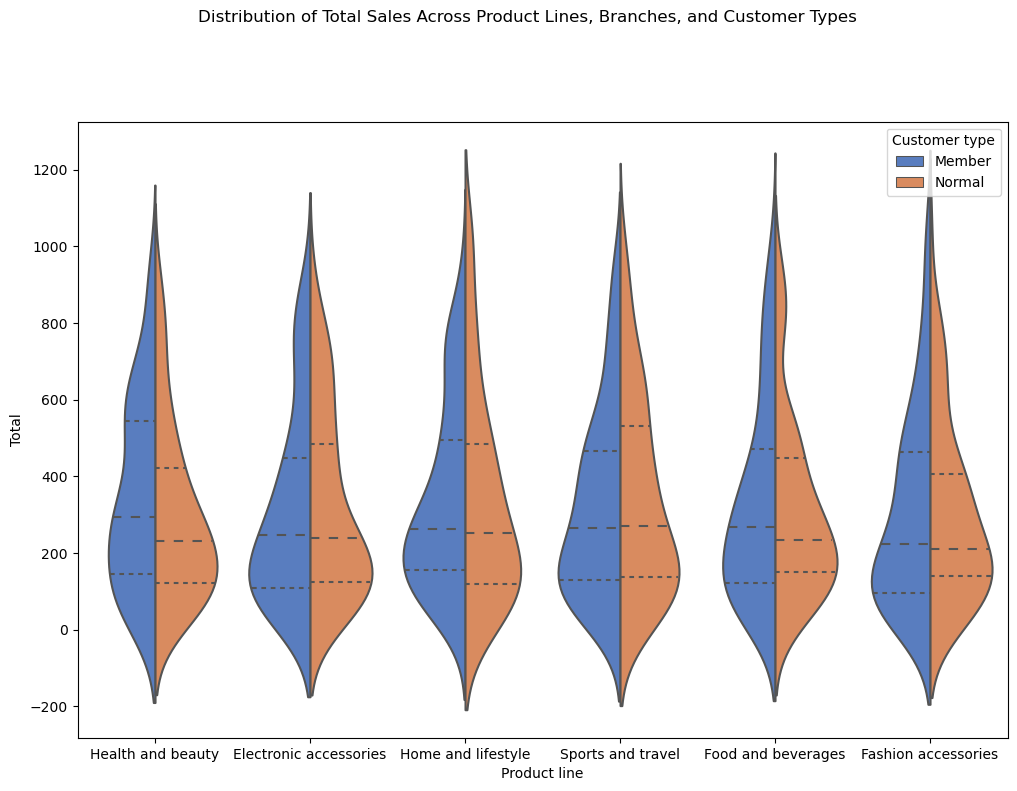

In [210]:
columns_for_analysis = ['Product line', 'Total', 'City', 'Customer type']

subset_df = df[columns_for_analysis]

plt.figure(figsize=(12, 8))
sns.violinplot(x='Product line', y='Total', hue='Customer type', col='Branch', data=subset_df, split=True, inner='quart', palette='muted')
plt.suptitle('Distribution of Total Sales Across Product Lines, Branches, and Customer Types', y=1.02)
plt.show()

- It helps identify whether certain product lines are more popular among members or if there are branch-specific trends in sales by analyzing the width and shape of the violin plots can reveal patterns and differences in the distribution of total sales across various factors.

### Average Gross Income Across Product Lines, Branches, and Payment Methods

<Figure size 1200x800 with 0 Axes>

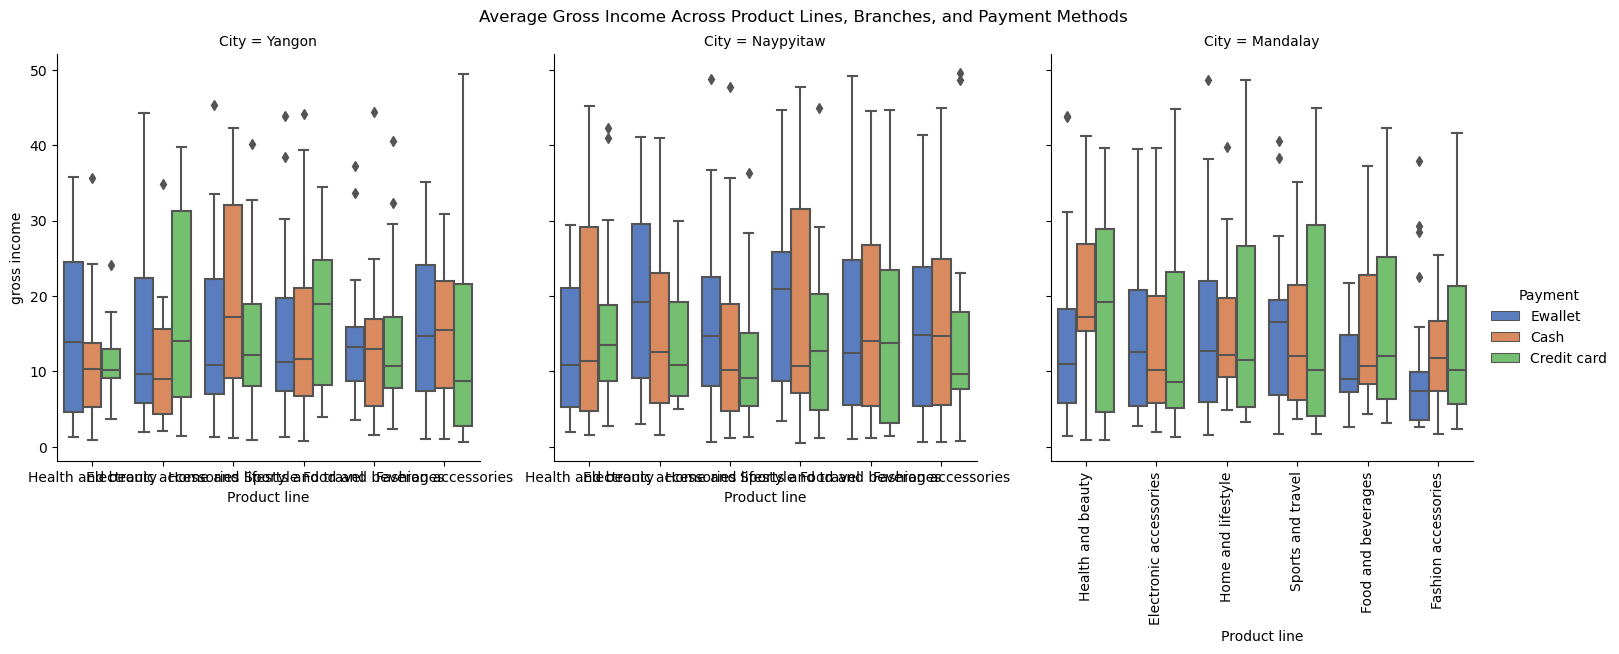

In [224]:
columns_for_analysis = ['Product line', 'gross income', 'City', 'Payment']

subset_df = df[columns_for_analysis]

plt.figure(figsize=(12, 8))
sns.catplot(x='Product line', y='gross income', hue='Payment', col='City', kind='box', data=subset_df, palette='muted')
plt.suptitle('Average Gross Income Across Product Lines, Branches, and Payment Methods', y=1.02)
plt.xticks(rotation=90)
plt.show()

- The visualization uses box plots to illustrate the distribution of gross income across different product lines for each branch, with a further breakdown based on the payment method used by customers.

### How does the relationship between the quantity of products purchased and the total sales vary across different product lines and customer types for each branch

<Figure size 1200x800 with 0 Axes>

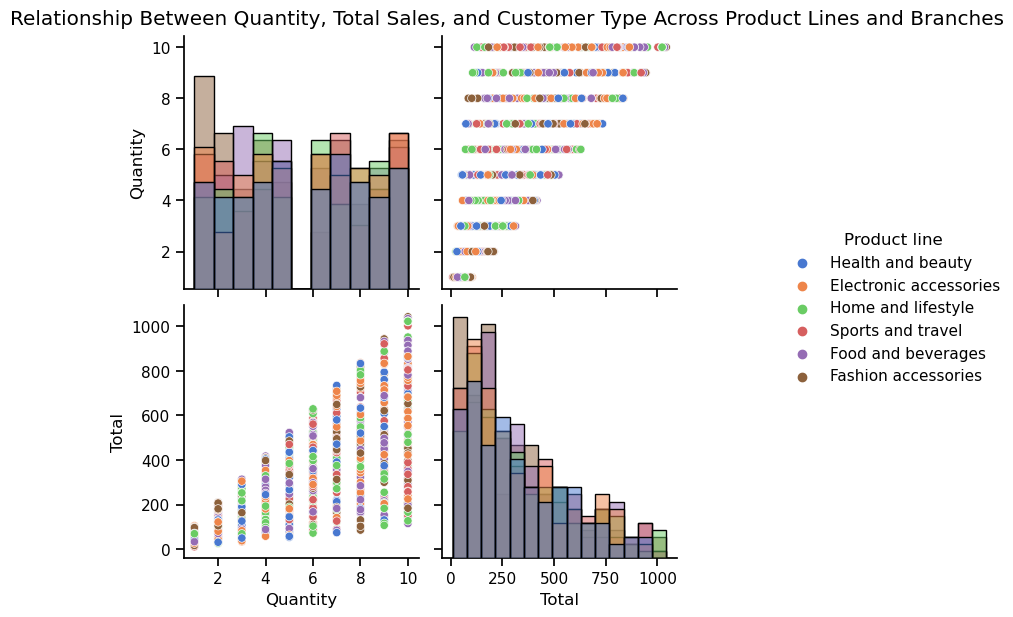

In [227]:
columns_for_analysis = ['Product line', 'Quantity', 'Total', 'City', 'Customer type']

subset_df = df[columns_for_analysis]

plt.figure(figsize=(12, 8))
scatter_matrix = sns.pairplot(subset_df, hue='Product line', markers='o', palette='muted', diag_kind='hist', height=3)
scatter_matrix.fig.suptitle('Relationship Between Quantity, Total Sales, and Customer Type Across Product Lines and Branches', y=1.02)
plt.show()

From this :
- Analyzing these plots can help identify trends and correlations between quantity, total sales, and customer types across different product lines and branches.

# DISTRIBUTIONS

### Distribution of total column and normalizing it.

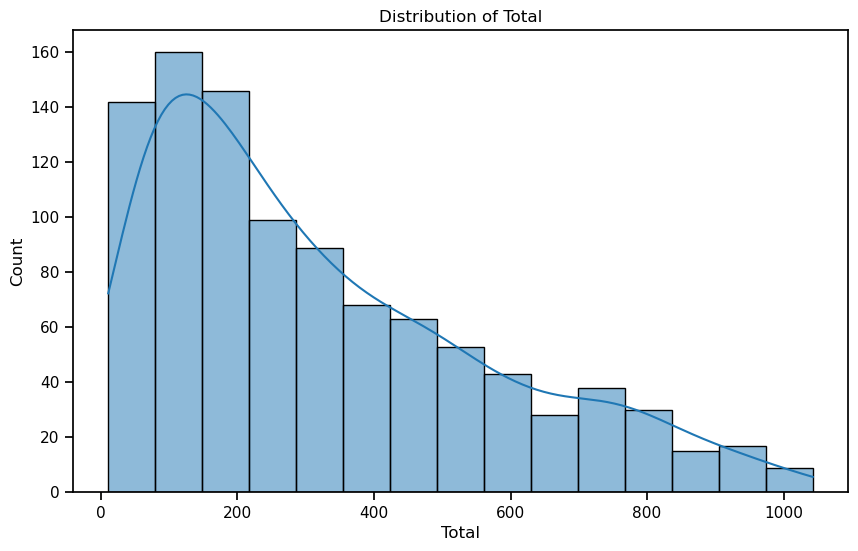

Normality Test p-value: 9.877588066864185e-23


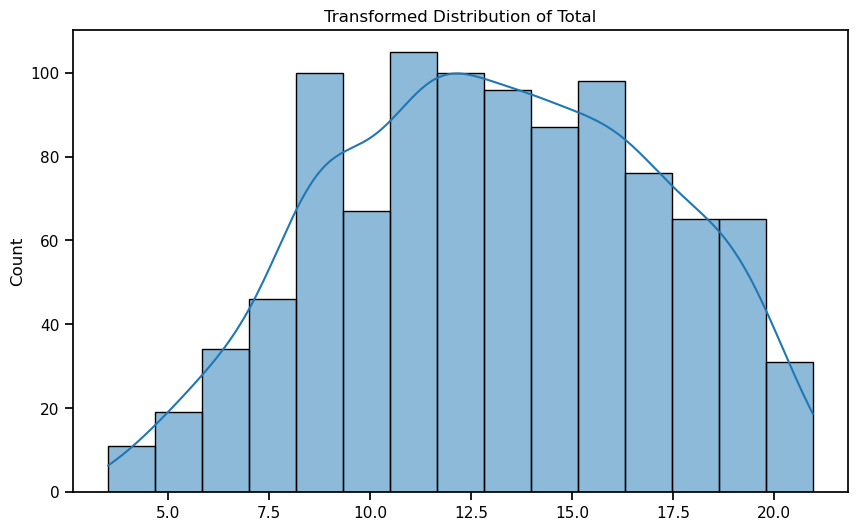

In [229]:
column_for_analysis = 'Total'

plt.figure(figsize=(10, 6))
sns.histplot(df[column_for_analysis], kde=True)
plt.title(f'Distribution of {column_for_analysis}')
plt.show()

statistic, p_value = normaltest(df[column_for_analysis])
print(f"Normality Test p-value: {p_value}")

if p_value < 0.05:
    transformed_data, _ = boxcox(df[column_for_analysis] + 1)  
    
    plt.figure(figsize=(10, 6))
    sns.histplot(transformed_data, kde=True)
    plt.title(f'Transformed Distribution of {column_for_analysis}')
    plt.show()
else:
    print(f"The {column_for_analysis} column already follows a normal distribution.")


### Distribution of Quantity column and normalizing it.

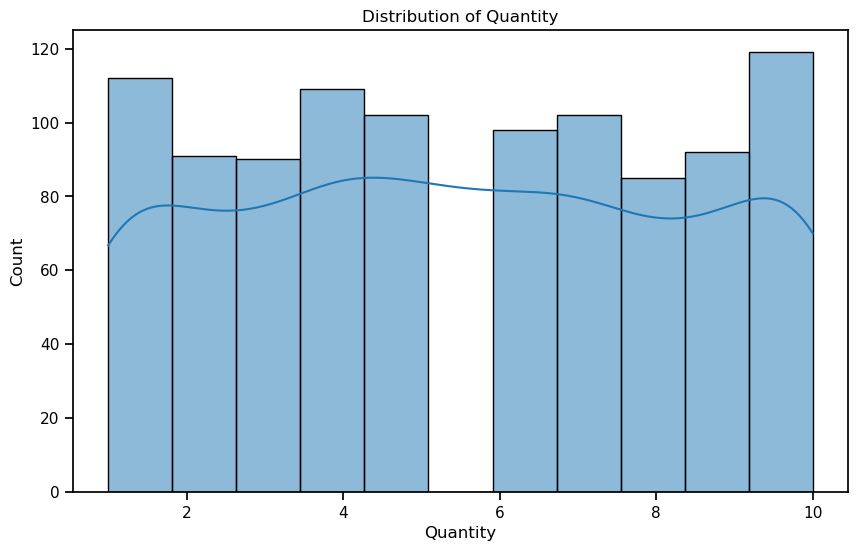

Normality Test p-value: 4.566169580917064e-182


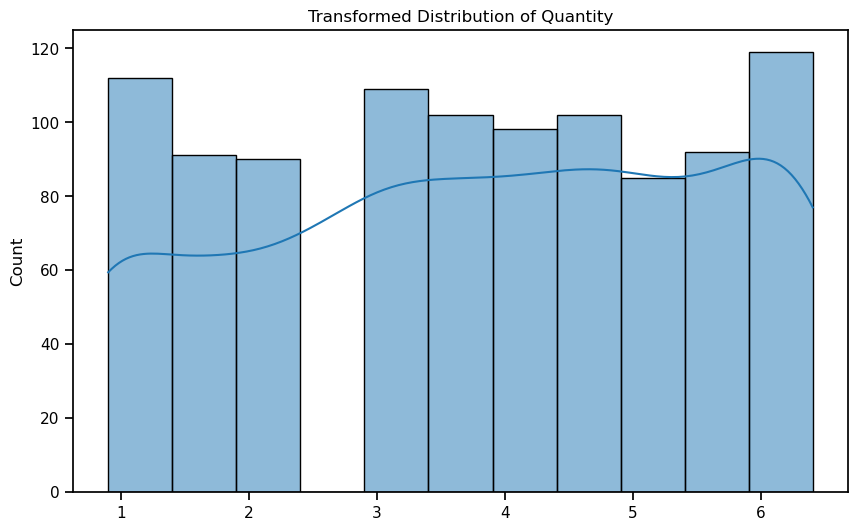

In [233]:
column_for_analysis = 'Quantity'

plt.figure(figsize=(10, 6))
sns.histplot(df[column_for_analysis], kde=True)
plt.title(f'Distribution of {column_for_analysis}')
plt.show()

statistic, p_value = normaltest(df[column_for_analysis])
print(f"Normality Test p-value: {p_value}")

if p_value < 0.05:
    transformed_data, _ = boxcox(df[column_for_analysis] + 1)  
    plt.figure(figsize=(10, 6))
    sns.histplot(transformed_data, kde=True)
    plt.title(f'Transformed Distribution of {column_for_analysis}')
    plt.show()
else:
    print(f"The {column_for_analysis} column already follows a normal distribution.")


### Distribution of gross income column and normalizing it.

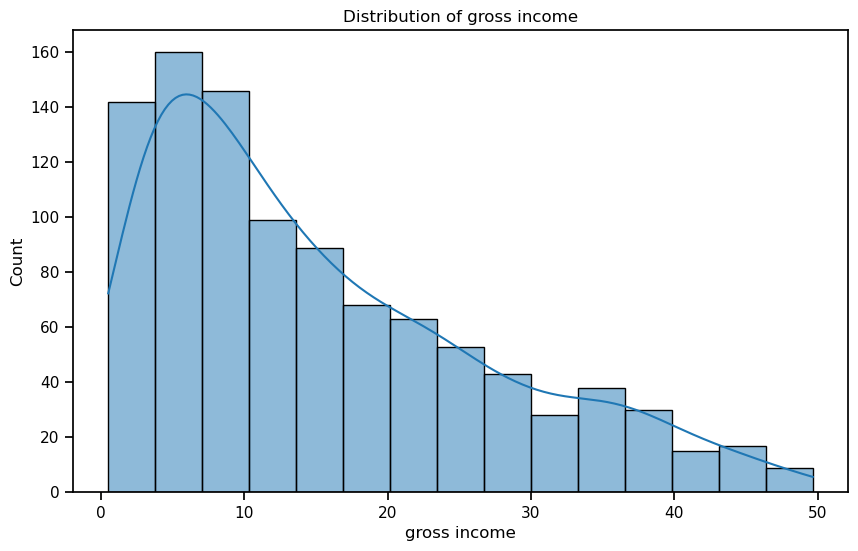

Normality Test p-value: 9.877588066863897e-23


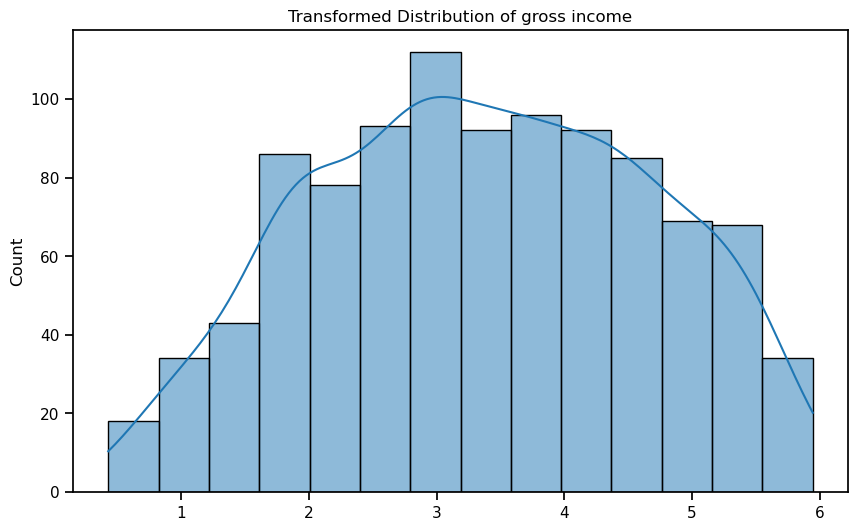

In [234]:
column_for_analysis = 'gross income'

plt.figure(figsize=(10, 6))
sns.histplot(df[column_for_analysis], kde=True)
plt.title(f'Distribution of {column_for_analysis}')
plt.show()

statistic, p_value = normaltest(df[column_for_analysis].dropna()) 
print(f"Normality Test p-value: {p_value}")

if p_value < 0.05:
    transformed_data, _ = boxcox(df[column_for_analysis].dropna() + 1) 
    plt.figure(figsize=(10, 6))
    sns.histplot(transformed_data, kde=True)
    plt.title(f'Transformed Distribution of {column_for_analysis}')
    plt.show()
else:
    print(f"The {column_for_analysis} column already follows a normal distribution.")


# HYPOTHESIS TESTING

### Hypothesis on total sales and Member type

In [236]:
columns_for_analysis = ['Total', 'Customer type']

subset_df = df[columns_for_analysis]

members_data = subset_df[subset_df['Customer type'] == 'Member']['Total']
normal_data = subset_df[subset_df['Customer type'] == 'Normal']['Total']

t_statistic, p_value = stats.ttest_ind(members_data, normal_data, equal_var=False)

print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference in total sales between Members and Normal customers.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference in total sales between Members and Normal customers.')


T-Statistic: 0.6215475684596813
P-Value: 0.5343813752186699
Fail to reject the null hypothesis: There is no significant difference in total sales between Members and Normal customers.


- This performs a two-sample t-test to compare the total sales between Members and Normal customers.
- The null hypothesis is that there is no significant difference, and the alternative hypothesis is that there is a significant difference.
- If the p-value is less than the chosen significance level (commonly 0.05), there is a significant difference in total sales between the two customer types.

### Another hypothesis on City

In [239]:
columns_for_analysis = ['Rating', 'City']
subset_df = df[columns_for_analysis]

branch_A_data = subset_df[subset_df['City'] == 'A']['Rating']
branch_B_data = subset_df[subset_df['City'] == 'B']['Rating']
branch_C_data = subset_df[subset_df['City'] == 'C']['Rating']

f_statistic, p_value = stats.f_oneway(branch_A_data, branch_B_data, branch_C_data)

print(f'F-Statistic: {f_statistic}')
print(f'P-Value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference in average ratings between the branches.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference in average ratings between the branches.')


F-Statistic: nan
P-Value: nan
Fail to reject the null hypothesis: There is no significant difference in average ratings between the branches.


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:3869: DegenerateDataWarning:

at least one input has length 0



- The null hypothesis is that there is no significant difference in average ratings, and the alternative hypothesis is that there is a significant difference.

## CONCLUSION and INSIGHTS

From the above Analysis :
1. The city chosen for expansion should be Naypyitaw.
2. Open the store in Naypyitaw with a full-backed inventory of goods in product categories - Food and Beverages, Fashion Assesories and Electronics.
3. The company should improve service in Electronics domain.
4. Increase service in cash payment modes.


Other insights based on the analysis of the supermarket dataset,

- From this dataset we can see that the percent of male and female are equal by 50-50
- The highest rating recorded amount all customers is between 6 to 7
- The Male customers are using payment method of Ewallet more then the female customers
- The peek sales are at weekends.
- The company could potentially increase credit card payments by offering incenƟves to customers who currently prefer cash or eWallet payments.
- This could help diversify the modes of payment and possibly increase overall sales.
- The peak business hour is 7 PM.
- This insight can be used to manage staff schedules and ensure maximum efficiency during this one.
- Fashion accessories are the top-selling products, contribuing to 17.80% of sales.

Increasing the average unit price and gross margin percentage in order to maximize profits.
Promoting certain product lines that have high quantity sold can also increase revenue.
By targeting specific cities and customer types, the number of transactions can be increased.
Furthermore, improving the rating of the supermarket by gender can lead to increased customer satisfaction and loyalty.
Implementing strategies to minimize the amount of tax paid can also improve overall profitability.